In [1]:
import cv2 
import tensorflow as tf 
import os
from matplotlib import pyplot as plt 
import numpy as np 

In [12]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [13]:
mainDirectory = "../Brain Tumor Classification/Tumour Classfication Data/AugmentedData/"

In [14]:
imageHeight = 512
imageWidth = 512

# Types of the tumours and its directory name
tumourCategories = ["AugmentedGlioma", "AugmentedMeningioma", "AugmentedPituitary", "AugmentedNoTumor"] 

gliomaData = []
meningiomaData = []
pituitaryData = []
noTumor = []
for classess in tumourCategories:
    pathDirectory = os.path.join(mainDirectory, classess)
    for image in os.listdir(path=pathDirectory):
       # Taking images of all image directories
       image_array = cv2.imread(os.path.join(pathDirectory, image))
       image_array = cv2.resize(image_array, (imageHeight, imageWidth))
       if classess == "AugmentedGlioma":
         gliomaData.append(image_array)
       elif classess == "AugmentedMeningioma":
         meningiomaData.append(image_array)
       elif classess == "AugmentedPituitary":
         pituitaryData.append(image_array)
       else:
        noTumor.append(image_array)

# Converting the lists into numpy arrays for tumour types
gliomaData = np.array(gliomaData)
meningiomaData = np.array(meningiomaData)
pituitaryData = np.array(pituitaryData)
noTumor = np.array(noTumor)

KeyboardInterrupt: 

In [ ]:
plt.imshow(meningiomaData[1900])

In [ ]:
gliomaData.shape

In [ ]:
meningiomaData[1900].shape

In [ ]:

plt.imshow(gliomaData[500])

In [ ]:
# Define the gamma value
gamma = 1.5

# Function to apply gamma correction
def applyGammaCorrection(images, gamma):
    for index in range(0, len(images)):
          # Normalize pixel values to the range [0, 1]
          normalized_image = images[index] / 255.0
    
          # Apply gamma correction
          corrected_image = np.power(normalized_image, gamma)
    
          # Denormalize the image to the original range [0, 255]
          corrected_image = (corrected_image * 255).astype(np.uint8)
    
          images[index] = corrected_image
      
    

# Apply gamma correction to gliomaData
applyGammaCorrection(gliomaData, gamma)
applyGammaCorrection(meningiomaData, gamma)
applyGammaCorrection(pituitaryData, gamma)
applyGammaCorrection(noTumor, gamma)

In [ ]:
gliomaData.shape

In [ ]:
plt.imshow(gliomaData[500])

In [ ]:
plt.imshow(meningiomaData[1900])

In [ ]:
plt.imshow(noTumor[1743])

In [ ]:
plt.imshow(pituitaryData[135])

In [ ]:
# Types of the tumours and its directory name
tumourCategories = ["Glioma", "Meningioma", "Pituitary", "NoTumor"]

# Combine image data and labels
allImages = np.concatenate([gliomaData, meningiomaData, pituitaryData, noTumor], axis=0)

# Create corresponding labels based on the class names
allLabels = np.concatenate([
    np.full(len(gliomaData), "Glioma"),       # Label for glioma
    np.full(len(meningiomaData), "Meningioma"), # Label for meningioma
    np.full(len(pituitaryData), "Pituitary"),   # Label for pituitary
    np.full(len(noTumor), "NoTumor")            # Label for no tumor
], axis=0)

In [ ]:
allImages.shape

In [ ]:
plt.imshow(allImages[500])
plt.title(allLabels[500])
plt.show()

In [ ]:
plt.imshow(allImages[18900])
plt.title(allLabels[18900])
plt.show()

In [ ]:
plt.imshow(allImages[12600])
plt.title(allLabels[12600])
plt.show()

In [ ]:
plt.imshow(allImages[27799])
plt.title(allLabels[27799])
plt.show()

In [ ]:
resizedImages = [cv2.resize(img, (256, 256)) for img in allImages]
allImages = np.array(resizedImages)

In [ ]:
import gc  #delete garbage otherwise there is a memory issue
gc.collect()

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(allImages, allLabels, test_size=0.3, random_state=4) 

In [ ]:
train_x.shape

In [ ]:
train_y.shape

In [ ]:
test_x.shape

In [ ]:
test_y.shape

In [ ]:
plt.imshow(train_x[100])
plt.title(train_y[100])

In [ ]:
flattened_train_x.shape, flattened_test_x.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Use fit_transform on the training set
labelEncoder = LabelEncoder()
train_y_encoded = labelEncoder.fit_transform(train_y)

# Use transform on the test set
test_y_encoded = labelEncoder.transform(test_y)

# Main directory to store training and testing data
mainDataDirectory = "C:/Users/laksh/OneDrive/Desktop/Cranium Cryptics/Cranium-Cryptics/Brain Tumor Classification/Tumour Classfication Data/TumourClassificationImages"

# Making two directories for both training and testing data sets
trainDirectory = os.path.join(mainDataDirectory, 'Train')
testDirectory = os.path.join(mainDataDirectory, 'Test')

# Categories of tumour classification
tumourCategories = ["Glioma", "Meningioma", "NoTumor", "Pituitary"]

# Creating the subdirectories by checking whether they already exist
for category in tumourCategories:
    os.makedirs(os.path.join(trainDirectory, category), exist_ok=True)
    os.makedirs(os.path.join(testDirectory, category), exist_ok=True)

# Save training images
for i in range(len(train_x)):
    category = tumourCategories[int(train_y_encoded[i])]
    filename = f"{category}_train_{i}.jpg"
    filepath = os.path.join(trainDirectory, category, filename)
    cv2.imwrite(filepath, train_x[i])

# Save testing images
for i in range(len(test_x)):
    category = tumourCategories[int(test_y_encoded[i])]
    filename = f"{category}_test_{i}.jpg"
    filepath = os.path.join(testDirectory, category, filename)
    cv2.imwrite(filepath, test_x[i])

# Perform garbage collection to free up memory
gc.collect()

In [2]:
import gc
# Categories of tumour classification
tumourCategories = ["Glioma", "Meningioma", "NoTumor", "Pituitary"]
# Main directory where data is saved
mainDataDirectory = "C:/Users/laksh/OneDrive/Desktop/Cranium Cryptics/Cranium-Cryptics/Brain Tumor Classification/Tumour Classfication Data/TumourClassificationImages"

# Directories for training and testing data
trainDirectory = os.path.join(mainDataDirectory, 'Train')
testDirectory = os.path.join(mainDataDirectory, 'Test')

# Function to read images from a directory
def read_images_from_directory(directory):
    images = []
    labels = []
    for category in tumourCategories:
        category_path = os.path.join(directory, category)
        label = tumourCategories.index(category)
        for filename in os.listdir(category_path):
            image_path = os.path.join(category_path, filename)
            image = cv2.imread(image_path)
            # You may need to resize or preprocess the images here if necessary
            images.append(image)
            if label == 0:
                labels.append("Glioma")
            elif label == 1:
                labels.append("Meningioma")
            elif label == 2:
                labels.append("NoTumor")
            elif label == 3:
                labels.append("Pituitary")
    return images, labels

# Read training images
train_x, train_y = read_images_from_directory(trainDirectory)

# Read testing images
test_x, test_y = read_images_from_directory(testDirectory)

# Convert the lists to numpy arrays
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

# Perform garbage collection to free up memory
gc.collect()

0

In [3]:
train_x.shape

(24852, 256, 256, 3)

In [4]:
train_y.shape

(24852,)

In [5]:
test_x.shape

(10599, 256, 256, 3)

In [6]:
test_y.shape

(10599,)

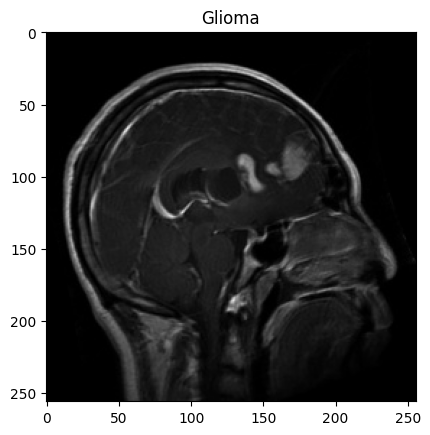

In [7]:
plt.imshow(train_x[600]) 
plt.title(train_y[600])
plt.show()

In [8]:
np.unique(train_y)

array(['Glioma', 'Meningioma', 'NoTumor', 'Pituitary'], dtype='<U10')

In [9]:
# To get the count of each class images
unique_classes, class_counts = np.unique(train_y, return_counts=True)

for class_label, count in zip(unique_classes, class_counts):
    print(f"{class_label}: {count} samples")

Glioma: 6995 samples
Meningioma: 5935 samples
NoTumor: 5893 samples
Pituitary: 6029 samples


In [13]:
# Making 1000 image sample just for testing 
import random
sample_train_x = []
sample_train_y = []
sample_test_x = []
sample_test_y = []

for index in range(0, 3000):
    value = random.randint(0, len(train_x))
    sample_train_x.append(train_x[value])
    sample_train_y.append(train_y[value])

for index in range(0, 500):
    value = random.randint(0, len(test_x))
    sample_test_x.append(test_x[value])
    sample_test_y.append(test_y[value])

sample_train_x = np.array(sample_train_x)
sample_train_y = np.array(sample_train_y)
sample_test_x = np.array(sample_test_x)
sample_test_y = np.array(sample_test_y)

IndexError: index 10599 is out of bounds for axis 0 with size 10599

In [ ]:
sample_train_x.shape, sample_train_y.shape, sample_test_x.shape, sample_test_y.shape

In [ ]:
plt.imshow(sample_train_x[400])
plt.title(sample_train_y[400])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
sample_train_y = label_encoder.fit_transform(sample_train_y)
sample_test_y = label_encoder.fit_transform(sample_test_y)  

In [ ]:
# To get the count of each class images
unique_classes, class_counts = np.unique(sample_train_y, return_counts=True)

for class_label, count in zip(unique_classes, class_counts):
    print(f"{class_label}: {count} samples")

In [ ]:
sample_train_x.shape, sample_test_x.shape, sample_test_y.shape, sample_train_y.shape

In [ ]:
sample_test_y[0] 

In [ ]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

In [ ]:
train_y.dtype

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_y = label_encoder.fit_transform(train_y)
test_y = label_encoder.fit_transform(test_y)  

In [ ]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(sample_test_x, sample_test_y)
print(f'Test accuracy: {test_acc}')

# Save the model if needed
model.save('brain_tumor_classification_resnet50.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming you have the following variables defined: train_x, test_x, train_y, test_y

# Convert labels to one-hot encoded format
train_y_one_hot = to_categorical(train_y, num_classes=4)  # Adjust num_classes based on your dataset
test_y_one_hot = to_categorical(test_y, num_classes=4)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  # Assuming 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y_one_hot, epochs=10, batch_size=16, validation_data=(test_x, test_y_one_hot))


Epoch 1/10
1546/1546 [==============================] - 7106s 5s/step - loss: 1.3411 - accuracy: 0.7340 - val_loss: 0.2842 - val_accuracy: 0.8918
Epoch 2/10
1546/1546 [==============================] - 7101s 5s/step - loss: 0.4828 - accuracy: 0.8134 - val_loss: 0.2694 - val_accuracy: 0.9128
Epoch 3/10
1546/1546 [==============================] - 7079s 5s/step - loss: 0.4246 - accuracy: 0.8418 - val_loss: 0.1892 - val_accuracy: 0.9388
Epoch 4/10
1546/1546 [==============================] - 7073s 5s/step - loss: 0.3689 - accuracy: 0.8692 - val_loss: 0.1713 - val_accuracy: 0.9519
Epoch 5/10
1546/1546 [==============================] - 7102s 5s/step - loss: 0.3455 - accuracy: 0.8787 - val_loss: 0.3375 - val_accuracy: 0.9213
Epoch 6/10
1546/1546 [==============================] - 7108s 5s/step - loss: 0.3241 - accuracy: 0.8891 - val_loss: 0.4298 - val_accuracy: 0.9246
Epoch 7/10
1546/1546 [==============================] - 7108s 5s/step - loss: 0.3069 - accuracy: 0.8895 - val_loss: 0.1707 -

In [4]:
from keras.models import load_model

# Load the model
model = load_model('brain_tumor_classification_vgg16.h5')

# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               8388864   
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 23104580 (88.14 MB)
Trainable params: 8389892 (32.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [114]:
from keras.utils import to_categorical

test_y_one_hot = to_categorical(test_y, num_classes=4)

test_loss, test_acc = model.evaluate(test_x, test_y_one_hot)
print(f'Test accuracy: {test_acc}')

332/332 [==============================] - 3764s 11s/step - loss: 0.1427 - accuracy: 0.9676
Test accuracy: 0.9676384329795837


In [22]:
train_x.shape

(24852, 256, 256, 3)

In [97]:
import numpy as np

image = np.expand_dims(train_x[0], axis=0)  
np.argmax(model.predict(image))

1/1 [==============================] - 0s 329ms/step


0

In [98]:
np.unique(train_y)

array([0, 1, 2, 3], dtype=int64)

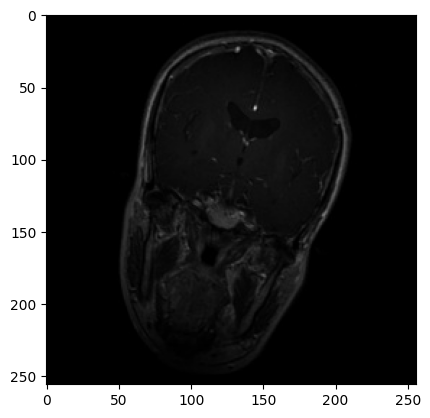

In [99]:
plt.imshow(train_x[0])

In [100]:
class_name = label_encoder.classes_[0]
class_name

'Glioma'

In [101]:
import numpy as np

image = np.expand_dims(train_x[9800], axis=0) 
class_name = label_encoder.classes_[np.argmax(model.predict(image))]
class_name

1/1 [==============================] - 0s 314ms/step


'Meningioma'

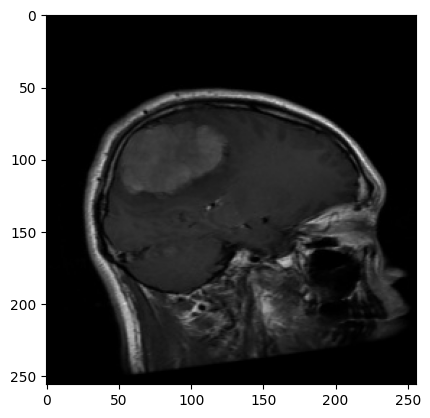

In [102]:
plt.imshow(train_x[9800])

In [109]:
image = np.expand_dims(test_x[7560], axis=0) 
class_name = label_encoder.classes_[np.argmax(model.predict(image))]
class_name

1/1 [==============================] - 0s 378ms/step


'NoTumor'

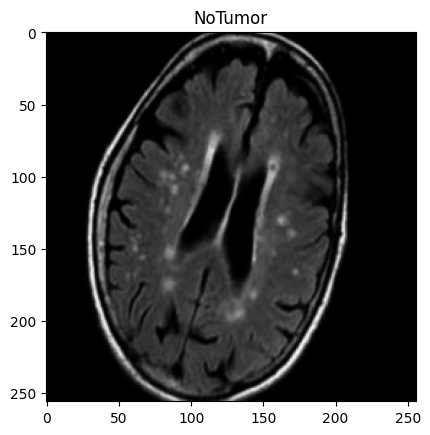

In [111]:
testingImage = label_encoder.classes_[test_y[7560]]
plt.imshow(test_x[7560])
plt.title(testingImage)
plt.show()

In [119]:
dt = {"Meningioma":[], "Glioma":[],"NoTumor":[], "Pituitary":[]}
count = 0
for image in test_x:
    testingImage = label_encoder.classes_[test_y[count]]
    Image = np.expand_dims(image, axis=0) 
    class_name = label_encoder.classes_[np.argmax(model.predict(Image))]
    if class_name == "Meningioma":
        if class_name == testingImage:
            dt["Meningioma"].append(True)
        else:
            dt["Meningioma"].append(False)
    if class_name == "Glioma":
        if class_name == testingImage:
            dt["Glioma"].append(True)
        else:
            dt["Glioma"].append(False)
    if class_name == "NoTumor":
        if class_name == testingImage:
            dt["NoTumor"].append(True)
        else:
            dt["NoTumor"].append(False)
    if class_name == "Pituitary":
        if class_name == testingImage:
            dt["Pituitary"].append(True)
        else:
            dt["Pituitary"].append(False)
    print(count)
            
    count = count + 1

1/1 [==============================] - 0s 308ms/step
0
1/1 [==============================] - 0s 260ms/step
1
1/1 [==============================] - 0s 303ms/step
2
1/1 [==============================] - 0s 263ms/step
3
1/1 [==============================] - 0s 307ms/step
4
1/1 [==============================] - 0s 284ms/step
5
1/1 [==============================] - 0s 293ms/step
6
1/1 [==============================] - 0s 275ms/step
7
1/1 [==============================] - 0s 271ms/step
8
1/1 [==============================] - 0s 305ms/step
9
1/1 [==============================] - 0s 304ms/step
10
1/1 [==============================] - 0s 291ms/step
11
1/1 [==============================] - 0s 291ms/step
12
1/1 [==============================] - 0s 291ms/step
13
1/1 [==============================] - 0s 284ms/step
14
1/1 [==============================] - 0s 279ms/step
15
1/1 [==============================] - 0s 294ms/step
16
1/1 [==============================] - 0s 284ms/step
17
1/

1/1 [==============================] - 0s 284ms/step
288
1/1 [==============================] - 0s 288ms/step
289
1/1 [==============================] - 0s 317ms/step
290
1/1 [==============================] - 0s 330ms/step
291
1/1 [==============================] - 0s 301ms/step
292
1/1 [==============================] - 0s 268ms/step
293
1/1 [==============================] - 0s 300ms/step
294
1/1 [==============================] - 0s 315ms/step
295
1/1 [==============================] - 0s 308ms/step
296
1/1 [==============================] - 0s 330ms/step
297
1/1 [==============================] - 0s 286ms/step
298
1/1 [==============================] - 0s 314ms/step
299
1/1 [==============================] - 0s 330ms/step
300
1/1 [==============================] - 0s 318ms/step
301
1/1 [==============================] - 0s 361ms/step
302
1/1 [==============================] - 0s 299ms/step
303
1/1 [==============================] - 0s 309ms/step
304
1/1 [==========================

1/1 [==============================] - 0s 254ms/step
574
1/1 [==============================] - 0s 278ms/step
575
1/1 [==============================] - 0s 279ms/step
576
1/1 [==============================] - 0s 291ms/step
577
1/1 [==============================] - 0s 256ms/step
578
1/1 [==============================] - 0s 258ms/step
579
1/1 [==============================] - 0s 287ms/step
580
1/1 [==============================] - 0s 266ms/step
581
1/1 [==============================] - 0s 311ms/step
582
1/1 [==============================] - 0s 294ms/step
583
1/1 [==============================] - 0s 277ms/step
584
1/1 [==============================] - 0s 277ms/step
585
1/1 [==============================] - 0s 278ms/step
586
1/1 [==============================] - 0s 279ms/step
587
1/1 [==============================] - 0s 279ms/step
588
1/1 [==============================] - 0s 279ms/step
589
1/1 [==============================] - 0s 290ms/step
590
1/1 [==========================

1/1 [==============================] - 0s 289ms/step
860
1/1 [==============================] - 0s 316ms/step
861
1/1 [==============================] - 0s 301ms/step
862
1/1 [==============================] - 0s 323ms/step
863
1/1 [==============================] - 0s 309ms/step
864
1/1 [==============================] - 0s 368ms/step
865
1/1 [==============================] - 0s 301ms/step
866
1/1 [==============================] - 0s 282ms/step
867
1/1 [==============================] - 0s 286ms/step
868
1/1 [==============================] - 0s 323ms/step
869
1/1 [==============================] - 0s 305ms/step
870
1/1 [==============================] - 0s 274ms/step
871
1/1 [==============================] - 0s 322ms/step
872
1/1 [==============================] - 0s 288ms/step
873
1/1 [==============================] - 0s 332ms/step
874
1/1 [==============================] - 0s 296ms/step
875
1/1 [==============================] - 0s 354ms/step
876
1/1 [==========================

1/1 [==============================] - 0s 347ms/step
1144
1/1 [==============================] - 0s 263ms/step
1145
1/1 [==============================] - 0s 258ms/step
1146
1/1 [==============================] - 0s 301ms/step
1147
1/1 [==============================] - 0s 324ms/step
1148
1/1 [==============================] - 0s 282ms/step
1149
1/1 [==============================] - 0s 295ms/step
1150
1/1 [==============================] - 0s 255ms/step
1151
1/1 [==============================] - 0s 321ms/step
1152
1/1 [==============================] - 0s 300ms/step
1153
1/1 [==============================] - 0s 291ms/step
1154
1/1 [==============================] - 0s 300ms/step
1155
1/1 [==============================] - 0s 297ms/step
1156
1/1 [==============================] - 0s 315ms/step
1157
1/1 [==============================] - 0s 319ms/step
1158
1/1 [==============================] - 0s 332ms/step
1159
1/1 [==============================] - 0s 300ms/step
1160
1/1 [=========

1/1 [==============================] - 0s 319ms/step
1426
1/1 [==============================] - 0s 318ms/step
1427
1/1 [==============================] - 0s 301ms/step
1428
1/1 [==============================] - 0s 301ms/step
1429
1/1 [==============================] - 0s 317ms/step
1430
1/1 [==============================] - 0s 298ms/step
1431
1/1 [==============================] - 0s 320ms/step
1432
1/1 [==============================] - 0s 335ms/step
1433
1/1 [==============================] - 0s 332ms/step
1434
1/1 [==============================] - 0s 306ms/step
1435
1/1 [==============================] - 0s 345ms/step
1436
1/1 [==============================] - 0s 334ms/step
1437
1/1 [==============================] - 0s 335ms/step
1438
1/1 [==============================] - 0s 298ms/step
1439
1/1 [==============================] - 0s 305ms/step
1440
1/1 [==============================] - 0s 348ms/step
1441
1/1 [==============================] - 0s 304ms/step
1442
1/1 [=========

1/1 [==============================] - 0s 248ms/step
1708
1/1 [==============================] - 0s 311ms/step
1709
1/1 [==============================] - 0s 310ms/step
1710
1/1 [==============================] - 0s 257ms/step
1711
1/1 [==============================] - 0s 294ms/step
1712
1/1 [==============================] - 0s 282ms/step
1713
1/1 [==============================] - 0s 307ms/step
1714
1/1 [==============================] - 0s 295ms/step
1715
1/1 [==============================] - 0s 263ms/step
1716
1/1 [==============================] - 0s 310ms/step
1717
1/1 [==============================] - 0s 313ms/step
1718
1/1 [==============================] - 0s 276ms/step
1719
1/1 [==============================] - 0s 255ms/step
1720
1/1 [==============================] - 0s 263ms/step
1721
1/1 [==============================] - 0s 288ms/step
1722
1/1 [==============================] - 0s 297ms/step
1723
1/1 [==============================] - 0s 263ms/step
1724
1/1 [=========

1/1 [==============================] - 0s 313ms/step
1990
1/1 [==============================] - 0s 310ms/step
1991
1/1 [==============================] - 0s 290ms/step
1992
1/1 [==============================] - 0s 301ms/step
1993
1/1 [==============================] - 0s 327ms/step
1994
1/1 [==============================] - 0s 341ms/step
1995
1/1 [==============================] - 0s 326ms/step
1996
1/1 [==============================] - 0s 304ms/step
1997
1/1 [==============================] - 0s 311ms/step
1998
1/1 [==============================] - 0s 327ms/step
1999
1/1 [==============================] - 0s 314ms/step
2000
1/1 [==============================] - 0s 327ms/step
2001
1/1 [==============================] - 0s 314ms/step
2002
1/1 [==============================] - 0s 328ms/step
2003
1/1 [==============================] - 0s 322ms/step
2004
1/1 [==============================] - 0s 328ms/step
2005
1/1 [==============================] - 0s 288ms/step
2006
1/1 [=========

1/1 [==============================] - 0s 252ms/step
2272
1/1 [==============================] - 0s 276ms/step
2273
1/1 [==============================] - 0s 279ms/step
2274
1/1 [==============================] - 0s 250ms/step
2275
1/1 [==============================] - 0s 279ms/step
2276
1/1 [==============================] - 0s 247ms/step
2277
1/1 [==============================] - 0s 324ms/step
2278
1/1 [==============================] - 0s 264ms/step
2279
1/1 [==============================] - 0s 314ms/step
2280
1/1 [==============================] - 0s 264ms/step
2281
1/1 [==============================] - 0s 281ms/step
2282
1/1 [==============================] - 0s 301ms/step
2283
1/1 [==============================] - 0s 264ms/step
2284
1/1 [==============================] - 0s 256ms/step
2285
1/1 [==============================] - 0s 298ms/step
2286
1/1 [==============================] - 0s 267ms/step
2287
1/1 [==============================] - 0s 262ms/step
2288
1/1 [=========

1/1 [==============================] - 0s 284ms/step
2554
1/1 [==============================] - 0s 261ms/step
2555
1/1 [==============================] - 0s 279ms/step
2556
1/1 [==============================] - 0s 259ms/step
2557
1/1 [==============================] - 0s 278ms/step
2558
1/1 [==============================] - 0s 261ms/step
2559
1/1 [==============================] - 0s 279ms/step
2560
1/1 [==============================] - 0s 295ms/step
2561
1/1 [==============================] - 0s 329ms/step
2562
1/1 [==============================] - 0s 257ms/step
2563
1/1 [==============================] - 0s 326ms/step
2564
1/1 [==============================] - 0s 295ms/step
2565
1/1 [==============================] - 0s 294ms/step
2566
1/1 [==============================] - 0s 279ms/step
2567
1/1 [==============================] - 0s 295ms/step
2568
1/1 [==============================] - 0s 274ms/step
2569
1/1 [==============================] - 0s 247ms/step
2570
1/1 [=========

1/1 [==============================] - 0s 282ms/step
2836
1/1 [==============================] - 0s 264ms/step
2837
1/1 [==============================] - 0s 260ms/step
2838
1/1 [==============================] - 0s 263ms/step
2839
1/1 [==============================] - 0s 260ms/step
2840
1/1 [==============================] - 0s 280ms/step
2841
1/1 [==============================] - 0s 279ms/step
2842
1/1 [==============================] - 0s 295ms/step
2843
1/1 [==============================] - 0s 282ms/step
2844
1/1 [==============================] - 0s 279ms/step
2845
1/1 [==============================] - 0s 298ms/step
2846
1/1 [==============================] - 0s 280ms/step
2847
1/1 [==============================] - 0s 279ms/step
2848
1/1 [==============================] - 0s 311ms/step
2849
1/1 [==============================] - 0s 305ms/step
2850
1/1 [==============================] - 0s 300ms/step
2851
1/1 [==============================] - 0s 350ms/step
2852
1/1 [=========

1/1 [==============================] - 0s 294ms/step
3118
1/1 [==============================] - 0s 326ms/step
3119
1/1 [==============================] - 0s 341ms/step
3120
1/1 [==============================] - 0s 310ms/step
3121
1/1 [==============================] - 0s 324ms/step
3122
1/1 [==============================] - 0s 324ms/step
3123
1/1 [==============================] - 0s 279ms/step
3124
1/1 [==============================] - 0s 279ms/step
3125
1/1 [==============================] - 0s 288ms/step
3126
1/1 [==============================] - 0s 296ms/step
3127
1/1 [==============================] - 0s 311ms/step
3128
1/1 [==============================] - 0s 294ms/step
3129
1/1 [==============================] - 0s 338ms/step
3130
1/1 [==============================] - 0s 352ms/step
3131
1/1 [==============================] - 0s 326ms/step
3132
1/1 [==============================] - 0s 335ms/step
3133
1/1 [==============================] - 0s 344ms/step
3134
1/1 [=========

1/1 [==============================] - 0s 301ms/step
3400
1/1 [==============================] - 0s 310ms/step
3401
1/1 [==============================] - 0s 322ms/step
3402
1/1 [==============================] - 0s 345ms/step
3403
1/1 [==============================] - 0s 309ms/step
3404
1/1 [==============================] - 0s 310ms/step
3405
1/1 [==============================] - 0s 270ms/step
3406
1/1 [==============================] - 0s 326ms/step
3407
1/1 [==============================] - 0s 327ms/step
3408
1/1 [==============================] - 0s 357ms/step
3409
1/1 [==============================] - 0s 290ms/step
3410
1/1 [==============================] - 0s 344ms/step
3411
1/1 [==============================] - 0s 318ms/step
3412
1/1 [==============================] - 0s 256ms/step
3413
1/1 [==============================] - 0s 347ms/step
3414
1/1 [==============================] - 0s 314ms/step
3415
1/1 [==============================] - 0s 288ms/step
3416
1/1 [=========

1/1 [==============================] - 0s 299ms/step
3682
1/1 [==============================] - 0s 315ms/step
3683
1/1 [==============================] - 0s 331ms/step
3684
1/1 [==============================] - 0s 282ms/step
3685
1/1 [==============================] - 0s 283ms/step
3686
1/1 [==============================] - 0s 293ms/step
3687
1/1 [==============================] - 0s 283ms/step
3688
1/1 [==============================] - 0s 299ms/step
3689
1/1 [==============================] - 0s 283ms/step
3690
1/1 [==============================] - 0s 330ms/step
3691
1/1 [==============================] - 0s 299ms/step
3692
1/1 [==============================] - 0s 268ms/step
3693
1/1 [==============================] - 0s 305ms/step
3694
1/1 [==============================] - 0s 315ms/step
3695
1/1 [==============================] - 0s 315ms/step
3696
1/1 [==============================] - 0s 283ms/step
3697
1/1 [==============================] - 0s 267ms/step
3698
1/1 [=========

1/1 [==============================] - 0s 307ms/step
3964
1/1 [==============================] - 0s 321ms/step
3965
1/1 [==============================] - 0s 310ms/step
3966
1/1 [==============================] - 0s 309ms/step
3967
1/1 [==============================] - 0s 266ms/step
3968
1/1 [==============================] - 0s 314ms/step
3969
1/1 [==============================] - 0s 326ms/step
3970
1/1 [==============================] - 0s 305ms/step
3971
1/1 [==============================] - 0s 304ms/step
3972
1/1 [==============================] - 0s 295ms/step
3973
1/1 [==============================] - 0s 307ms/step
3974
1/1 [==============================] - 0s 298ms/step
3975
1/1 [==============================] - 0s 295ms/step
3976
1/1 [==============================] - 0s 298ms/step
3977
1/1 [==============================] - 0s 326ms/step
3978
1/1 [==============================] - 0s 319ms/step
3979
1/1 [==============================] - 0s 299ms/step
3980
1/1 [=========

1/1 [==============================] - 0s 303ms/step
4246
1/1 [==============================] - 0s 277ms/step
4247
1/1 [==============================] - 0s 272ms/step
4248
1/1 [==============================] - 0s 298ms/step
4249
1/1 [==============================] - 0s 281ms/step
4250
1/1 [==============================] - 0s 309ms/step
4251
1/1 [==============================] - 0s 260ms/step
4252
1/1 [==============================] - 0s 290ms/step
4253
1/1 [==============================] - 0s 291ms/step
4254
1/1 [==============================] - 0s 308ms/step
4255
1/1 [==============================] - 0s 293ms/step
4256
1/1 [==============================] - 0s 270ms/step
4257
1/1 [==============================] - 0s 265ms/step
4258
1/1 [==============================] - 0s 302ms/step
4259
1/1 [==============================] - 0s 285ms/step
4260
1/1 [==============================] - 0s 297ms/step
4261
1/1 [==============================] - 0s 275ms/step
4262
1/1 [=========

1/1 [==============================] - 0s 299ms/step
4528
1/1 [==============================] - 0s 318ms/step
4529
1/1 [==============================] - 0s 335ms/step
4530
1/1 [==============================] - 0s 277ms/step
4531
1/1 [==============================] - 0s 321ms/step
4532
1/1 [==============================] - 0s 326ms/step
4533
1/1 [==============================] - 0s 325ms/step
4534
1/1 [==============================] - 0s 342ms/step
4535
1/1 [==============================] - 0s 327ms/step
4536
1/1 [==============================] - 0s 338ms/step
4537
1/1 [==============================] - 0s 318ms/step
4538
1/1 [==============================] - 0s 321ms/step
4539
1/1 [==============================] - 0s 304ms/step
4540
1/1 [==============================] - 0s 310ms/step
4541
1/1 [==============================] - 0s 295ms/step
4542
1/1 [==============================] - 0s 326ms/step
4543
1/1 [==============================] - 0s 294ms/step
4544
1/1 [=========

1/1 [==============================] - 0s 330ms/step
4810
1/1 [==============================] - 0s 346ms/step
4811
1/1 [==============================] - 0s 295ms/step
4812
1/1 [==============================] - 0s 343ms/step
4813
1/1 [==============================] - 0s 306ms/step
4814
1/1 [==============================] - 0s 328ms/step
4815
1/1 [==============================] - 0s 282ms/step
4816
1/1 [==============================] - 0s 326ms/step
4817
1/1 [==============================] - 0s 295ms/step
4818
1/1 [==============================] - 0s 314ms/step
4819
1/1 [==============================] - 0s 328ms/step
4820
1/1 [==============================] - 0s 309ms/step
4821
1/1 [==============================] - 0s 333ms/step
4822
1/1 [==============================] - 0s 309ms/step
4823
1/1 [==============================] - 0s 288ms/step
4824
1/1 [==============================] - 0s 314ms/step
4825
1/1 [==============================] - 0s 327ms/step
4826
1/1 [=========

1/1 [==============================] - 0s 301ms/step
5092
1/1 [==============================] - 0s 314ms/step
5093
1/1 [==============================] - 0s 278ms/step
5094
1/1 [==============================] - 0s 323ms/step
5095
1/1 [==============================] - 0s 328ms/step
5096
1/1 [==============================] - 0s 298ms/step
5097
1/1 [==============================] - 0s 279ms/step
5098
1/1 [==============================] - 0s 307ms/step
5099
1/1 [==============================] - 0s 298ms/step
5100
1/1 [==============================] - 0s 309ms/step
5101
1/1 [==============================] - 0s 325ms/step
5102
1/1 [==============================] - 0s 330ms/step
5103
1/1 [==============================] - 0s 333ms/step
5104
1/1 [==============================] - 0s 346ms/step
5105
1/1 [==============================] - 0s 326ms/step
5106
1/1 [==============================] - 0s 309ms/step
5107
1/1 [==============================] - 0s 326ms/step
5108
1/1 [=========

1/1 [==============================] - 0s 320ms/step
5374
1/1 [==============================] - 0s 317ms/step
5375
1/1 [==============================] - 0s 325ms/step
5376
1/1 [==============================] - 0s 317ms/step
5377
1/1 [==============================] - 0s 314ms/step
5378
1/1 [==============================] - 0s 329ms/step
5379
1/1 [==============================] - 0s 343ms/step
5380
1/1 [==============================] - 0s 297ms/step
5381
1/1 [==============================] - 0s 263ms/step
5382
1/1 [==============================] - 0s 274ms/step
5383
1/1 [==============================] - 0s 326ms/step
5384
1/1 [==============================] - 0s 309ms/step
5385
1/1 [==============================] - 0s 294ms/step
5386
1/1 [==============================] - 0s 296ms/step
5387
1/1 [==============================] - 0s 317ms/step
5388
1/1 [==============================] - 0s 316ms/step
5389
1/1 [==============================] - 0s 347ms/step
5390
1/1 [=========

1/1 [==============================] - 0s 301ms/step
5656
1/1 [==============================] - 0s 314ms/step
5657
1/1 [==============================] - 0s 317ms/step
5658
1/1 [==============================] - 0s 299ms/step
5659
1/1 [==============================] - 0s 315ms/step
5660
1/1 [==============================] - 0s 283ms/step
5661
1/1 [==============================] - 0s 313ms/step
5662
1/1 [==============================] - 0s 330ms/step
5663
1/1 [==============================] - 0s 314ms/step
5664
1/1 [==============================] - 0s 326ms/step
5665
1/1 [==============================] - 0s 315ms/step
5666
1/1 [==============================] - 0s 314ms/step
5667
1/1 [==============================] - 0s 300ms/step
5668
1/1 [==============================] - 0s 331ms/step
5669
1/1 [==============================] - 0s 299ms/step
5670
1/1 [==============================] - 0s 299ms/step
5671
1/1 [==============================] - 0s 361ms/step
5672
1/1 [=========

1/1 [==============================] - 0s 280ms/step
5938
1/1 [==============================] - 0s 329ms/step
5939
1/1 [==============================] - 0s 295ms/step
5940
1/1 [==============================] - 0s 310ms/step
5941
1/1 [==============================] - 0s 326ms/step
5942
1/1 [==============================] - 0s 364ms/step
5943
1/1 [==============================] - 0s 305ms/step
5944
1/1 [==============================] - 0s 344ms/step
5945
1/1 [==============================] - 0s 312ms/step
5946
1/1 [==============================] - 0s 305ms/step
5947
1/1 [==============================] - 0s 304ms/step
5948
1/1 [==============================] - 0s 319ms/step
5949
1/1 [==============================] - 0s 327ms/step
5950
1/1 [==============================] - 0s 333ms/step
5951
1/1 [==============================] - 0s 301ms/step
5952
1/1 [==============================] - 0s 281ms/step
5953
1/1 [==============================] - 0s 256ms/step
5954
1/1 [=========

1/1 [==============================] - 0s 291ms/step
6220
1/1 [==============================] - 0s 311ms/step
6221
1/1 [==============================] - 0s 292ms/step
6222
1/1 [==============================] - 0s 276ms/step
6223
1/1 [==============================] - 0s 283ms/step
6224
1/1 [==============================] - 0s 295ms/step
6225
1/1 [==============================] - 0s 325ms/step
6226
1/1 [==============================] - 0s 263ms/step
6227
1/1 [==============================] - 0s 280ms/step
6228
1/1 [==============================] - 0s 280ms/step
6229
1/1 [==============================] - 0s 309ms/step
6230
1/1 [==============================] - 0s 297ms/step
6231
1/1 [==============================] - 0s 313ms/step
6232
1/1 [==============================] - 0s 288ms/step
6233
1/1 [==============================] - 0s 321ms/step
6234
1/1 [==============================] - 0s 279ms/step
6235
1/1 [==============================] - 0s 280ms/step
6236
1/1 [=========

1/1 [==============================] - 0s 323ms/step
6502
1/1 [==============================] - 0s 328ms/step
6503
1/1 [==============================] - 0s 306ms/step
6504
1/1 [==============================] - 0s 317ms/step
6505
1/1 [==============================] - 0s 321ms/step
6506
1/1 [==============================] - 0s 342ms/step
6507
1/1 [==============================] - 0s 343ms/step
6508
1/1 [==============================] - 0s 295ms/step
6509
1/1 [==============================] - 0s 345ms/step
6510
1/1 [==============================] - 0s 326ms/step
6511
1/1 [==============================] - 0s 343ms/step
6512
1/1 [==============================] - 0s 311ms/step
6513
1/1 [==============================] - 0s 299ms/step
6514
1/1 [==============================] - 0s 314ms/step
6515
1/1 [==============================] - 0s 276ms/step
6516
1/1 [==============================] - 0s 389ms/step
6517
1/1 [==============================] - 0s 342ms/step
6518
1/1 [=========

1/1 [==============================] - 0s 316ms/step
6784
1/1 [==============================] - 0s 299ms/step
6785
1/1 [==============================] - 0s 299ms/step
6786
1/1 [==============================] - 0s 329ms/step
6787
1/1 [==============================] - 0s 300ms/step
6788
1/1 [==============================] - 0s 330ms/step
6789
1/1 [==============================] - 0s 329ms/step
6790
1/1 [==============================] - 0s 341ms/step
6791
1/1 [==============================] - 0s 330ms/step
6792
1/1 [==============================] - 0s 362ms/step
6793
1/1 [==============================] - 0s 331ms/step
6794
1/1 [==============================] - 0s 330ms/step
6795
1/1 [==============================] - 0s 344ms/step
6796
1/1 [==============================] - 0s 267ms/step
6797
1/1 [==============================] - 0s 346ms/step
6798
1/1 [==============================] - 0s 346ms/step
6799
1/1 [==============================] - 0s 361ms/step
6800
1/1 [=========

1/1 [==============================] - 0s 316ms/step
7066
1/1 [==============================] - 0s 364ms/step
7067
1/1 [==============================] - 0s 310ms/step
7068
1/1 [==============================] - 0s 326ms/step
7069
1/1 [==============================] - 0s 342ms/step
7070
1/1 [==============================] - 0s 380ms/step
7071
1/1 [==============================] - 0s 345ms/step
7072
1/1 [==============================] - 0s 310ms/step
7073
1/1 [==============================] - 0s 353ms/step
7074
1/1 [==============================] - 0s 326ms/step
7075
1/1 [==============================] - 0s 342ms/step
7076
1/1 [==============================] - 0s 349ms/step
7077
1/1 [==============================] - 0s 324ms/step
7078
1/1 [==============================] - 0s 310ms/step
7079
1/1 [==============================] - 0s 362ms/step
7080
1/1 [==============================] - 0s 363ms/step
7081
1/1 [==============================] - 0s 341ms/step
7082
1/1 [=========

1/1 [==============================] - 0s 357ms/step
7348
1/1 [==============================] - 0s 310ms/step
7349
1/1 [==============================] - 0s 336ms/step
7350
1/1 [==============================] - 0s 325ms/step
7351
1/1 [==============================] - 0s 338ms/step
7352
1/1 [==============================] - 0s 361ms/step
7353
1/1 [==============================] - 0s 313ms/step
7354
1/1 [==============================] - 0s 328ms/step
7355
1/1 [==============================] - 0s 297ms/step
7356
1/1 [==============================] - 0s 340ms/step
7357
1/1 [==============================] - 0s 342ms/step
7358
1/1 [==============================] - 0s 297ms/step
7359
1/1 [==============================] - 0s 332ms/step
7360
1/1 [==============================] - 0s 348ms/step
7361
1/1 [==============================] - 0s 358ms/step
7362
1/1 [==============================] - 0s 346ms/step
7363
1/1 [==============================] - 0s 355ms/step
7364
1/1 [=========

1/1 [==============================] - 0s 324ms/step
7630
1/1 [==============================] - 0s 324ms/step
7631
1/1 [==============================] - 0s 308ms/step
7632
1/1 [==============================] - 0s 327ms/step
7633
1/1 [==============================] - 0s 330ms/step
7634
1/1 [==============================] - 0s 318ms/step
7635
1/1 [==============================] - 0s 358ms/step
7636
1/1 [==============================] - 0s 322ms/step
7637
1/1 [==============================] - 0s 384ms/step
7638
1/1 [==============================] - 0s 298ms/step
7639
1/1 [==============================] - 0s 279ms/step
7640
1/1 [==============================] - 0s 303ms/step
7641
1/1 [==============================] - 0s 303ms/step
7642
1/1 [==============================] - 0s 287ms/step
7643
1/1 [==============================] - 0s 295ms/step
7644
1/1 [==============================] - 0s 296ms/step
7645
1/1 [==============================] - 0s 340ms/step
7646
1/1 [=========

1/1 [==============================] - 0s 347ms/step
7912
1/1 [==============================] - 0s 346ms/step
7913
1/1 [==============================] - 0s 347ms/step
7914
1/1 [==============================] - 0s 346ms/step
7915
1/1 [==============================] - 0s 347ms/step
7916
1/1 [==============================] - 0s 346ms/step
7917
1/1 [==============================] - 0s 315ms/step
7918
1/1 [==============================] - 0s 346ms/step
7919
1/1 [==============================] - 0s 345ms/step
7920
1/1 [==============================] - 0s 299ms/step
7921
1/1 [==============================] - 0s 347ms/step
7922
1/1 [==============================] - 0s 377ms/step
7923
1/1 [==============================] - 0s 331ms/step
7924
1/1 [==============================] - 0s 315ms/step
7925
1/1 [==============================] - 0s 346ms/step
7926
1/1 [==============================] - 0s 330ms/step
7927
1/1 [==============================] - 0s 328ms/step
7928
1/1 [=========

1/1 [==============================] - 0s 306ms/step
8194
1/1 [==============================] - 0s 283ms/step
8195
1/1 [==============================] - 0s 275ms/step
8196
1/1 [==============================] - 0s 318ms/step
8197
1/1 [==============================] - 0s 271ms/step
8198
1/1 [==============================] - 0s 277ms/step
8199
1/1 [==============================] - 0s 331ms/step
8200
1/1 [==============================] - 0s 282ms/step
8201
1/1 [==============================] - 0s 327ms/step
8202
1/1 [==============================] - 0s 290ms/step
8203
1/1 [==============================] - 0s 342ms/step
8204
1/1 [==============================] - 0s 304ms/step
8205
1/1 [==============================] - 0s 283ms/step
8206
1/1 [==============================] - 0s 304ms/step
8207
1/1 [==============================] - 0s 288ms/step
8208
1/1 [==============================] - 0s 316ms/step
8209
1/1 [==============================] - 0s 273ms/step
8210
1/1 [=========

1/1 [==============================] - 0s 373ms/step
8476
1/1 [==============================] - 0s 389ms/step
8477
1/1 [==============================] - 0s 345ms/step
8478
1/1 [==============================] - 0s 319ms/step
8479
1/1 [==============================] - 0s 380ms/step
8480
1/1 [==============================] - 0s 345ms/step
8481
1/1 [==============================] - 0s 329ms/step
8482
1/1 [==============================] - 0s 348ms/step
8483
1/1 [==============================] - 0s 350ms/step
8484
1/1 [==============================] - 0s 363ms/step
8485
1/1 [==============================] - 0s 329ms/step
8486
1/1 [==============================] - 0s 343ms/step
8487
1/1 [==============================] - 0s 330ms/step
8488
1/1 [==============================] - 0s 332ms/step
8489
1/1 [==============================] - 0s 364ms/step
8490
1/1 [==============================] - 0s 343ms/step
8491
1/1 [==============================] - 0s 357ms/step
8492
1/1 [=========

1/1 [==============================] - 0s 337ms/step
8758
1/1 [==============================] - 0s 315ms/step
8759
1/1 [==============================] - 0s 358ms/step
8760
1/1 [==============================] - 0s 337ms/step
8761
1/1 [==============================] - 0s 358ms/step
8762
1/1 [==============================] - 0s 370ms/step
8763
1/1 [==============================] - 0s 333ms/step
8764
1/1 [==============================] - 0s 324ms/step
8765
1/1 [==============================] - 0s 360ms/step
8766
1/1 [==============================] - 0s 342ms/step
8767
1/1 [==============================] - 0s 352ms/step
8768
1/1 [==============================] - 0s 342ms/step
8769
1/1 [==============================] - 0s 336ms/step
8770
1/1 [==============================] - 0s 360ms/step
8771
1/1 [==============================] - 0s 373ms/step
8772
1/1 [==============================] - 0s 331ms/step
8773
1/1 [==============================] - 0s 388ms/step
8774
1/1 [=========

1/1 [==============================] - 0s 342ms/step
9040
1/1 [==============================] - 0s 319ms/step
9041
1/1 [==============================] - 0s 297ms/step
9042
1/1 [==============================] - 0s 299ms/step
9043
1/1 [==============================] - 0s 291ms/step
9044
1/1 [==============================] - 0s 304ms/step
9045
1/1 [==============================] - 0s 317ms/step
9046
1/1 [==============================] - 0s 275ms/step
9047
1/1 [==============================] - 0s 316ms/step
9048
1/1 [==============================] - 0s 333ms/step
9049
1/1 [==============================] - 0s 333ms/step
9050
1/1 [==============================] - 0s 328ms/step
9051
1/1 [==============================] - 0s 303ms/step
9052
1/1 [==============================] - 0s 305ms/step
9053
1/1 [==============================] - 0s 287ms/step
9054
1/1 [==============================] - 0s 322ms/step
9055
1/1 [==============================] - 0s 314ms/step
9056
1/1 [=========

1/1 [==============================] - 0s 386ms/step
9322
1/1 [==============================] - 0s 376ms/step
9323
1/1 [==============================] - 0s 342ms/step
9324
1/1 [==============================] - 0s 362ms/step
9325
1/1 [==============================] - 0s 374ms/step
9326
1/1 [==============================] - 0s 395ms/step
9327
1/1 [==============================] - 0s 364ms/step
9328
1/1 [==============================] - 0s 357ms/step
9329
1/1 [==============================] - 0s 407ms/step
9330
1/1 [==============================] - 0s 298ms/step
9331
1/1 [==============================] - 0s 377ms/step
9332
1/1 [==============================] - 0s 324ms/step
9333
1/1 [==============================] - 0s 361ms/step
9334
1/1 [==============================] - 0s 376ms/step
9335
1/1 [==============================] - 0s 351ms/step
9336
1/1 [==============================] - 0s 349ms/step
9337
1/1 [==============================] - 0s 365ms/step
9338
1/1 [=========

1/1 [==============================] - 0s 354ms/step
9604
1/1 [==============================] - 0s 348ms/step
9605
1/1 [==============================] - 0s 354ms/step
9606
1/1 [==============================] - 0s 377ms/step
9607
1/1 [==============================] - 0s 328ms/step
9608
1/1 [==============================] - 0s 316ms/step
9609
1/1 [==============================] - 0s 383ms/step
9610
1/1 [==============================] - 0s 299ms/step
9611
1/1 [==============================] - 0s 363ms/step
9612
1/1 [==============================] - 0s 311ms/step
9613
1/1 [==============================] - 0s 374ms/step
9614
1/1 [==============================] - 0s 361ms/step
9615
1/1 [==============================] - 0s 346ms/step
9616
1/1 [==============================] - 0s 341ms/step
9617
1/1 [==============================] - 0s 331ms/step
9618
1/1 [==============================] - 0s 306ms/step
9619
1/1 [==============================] - 0s 352ms/step
9620
1/1 [=========

1/1 [==============================] - 0s 331ms/step
9886
1/1 [==============================] - 0s 377ms/step
9887
1/1 [==============================] - 0s 375ms/step
9888
1/1 [==============================] - 0s 362ms/step
9889
1/1 [==============================] - 0s 346ms/step
9890
1/1 [==============================] - 0s 392ms/step
9891
1/1 [==============================] - 0s 346ms/step
9892
1/1 [==============================] - 0s 346ms/step
9893
1/1 [==============================] - 0s 298ms/step
9894
1/1 [==============================] - 0s 348ms/step
9895
1/1 [==============================] - 0s 378ms/step
9896
1/1 [==============================] - 0s 394ms/step
9897
1/1 [==============================] - 0s 377ms/step
9898
1/1 [==============================] - 0s 378ms/step
9899
1/1 [==============================] - 0s 391ms/step
9900
1/1 [==============================] - 0s 364ms/step
9901
1/1 [==============================] - 0s 347ms/step
9902
1/1 [=========

10026
1/1 [==============================] - 0s 299ms/step
10027
1/1 [==============================] - 0s 299ms/step
10028
1/1 [==============================] - 0s 315ms/step
10029
1/1 [==============================] - 0s 377ms/step
10030
1/1 [==============================] - 0s 330ms/step
10031
1/1 [==============================] - 0s 299ms/step
10032
1/1 [==============================] - 0s 324ms/step
10033
1/1 [==============================] - 0s 314ms/step
10034
1/1 [==============================] - 0s 330ms/step
10035
1/1 [==============================] - 0s 299ms/step
10036
1/1 [==============================] - 0s 335ms/step
10037
1/1 [==============================] - 0s 362ms/step
10038
1/1 [==============================] - 0s 346ms/step
10039
1/1 [==============================] - 0s 315ms/step
10040
1/1 [==============================] - 0s 330ms/step
10041
1/1 [==============================] - 0s 346ms/step
10042
1/1 [==============================] - 0s 345ms/st

10303
1/1 [==============================] - 0s 402ms/step
10304
1/1 [==============================] - 0s 345ms/step
10305
1/1 [==============================] - 0s 381ms/step
10306
1/1 [==============================] - 0s 361ms/step
10307
1/1 [==============================] - 0s 394ms/step
10308
1/1 [==============================] - 0s 393ms/step
10309
1/1 [==============================] - 0s 395ms/step
10310
1/1 [==============================] - 0s 407ms/step
10311
1/1 [==============================] - 0s 417ms/step
10312
1/1 [==============================] - 0s 368ms/step
10313
1/1 [==============================] - 0s 380ms/step
10314
1/1 [==============================] - 0s 385ms/step
10315
1/1 [==============================] - 0s 378ms/step
10316
1/1 [==============================] - 0s 396ms/step
10317
1/1 [==============================] - 0s 399ms/step
10318
1/1 [==============================] - 0s 396ms/step
10319
1/1 [==============================] - 0s 402ms/st

10580
1/1 [==============================] - 0s 386ms/step
10581
1/1 [==============================] - 0s 399ms/step
10582
1/1 [==============================] - 0s 395ms/step
10583
1/1 [==============================] - 0s 395ms/step
10584
1/1 [==============================] - 0s 405ms/step
10585
1/1 [==============================] - 0s 380ms/step
10586
1/1 [==============================] - 0s 365ms/step
10587
1/1 [==============================] - 0s 408ms/step
10588
1/1 [==============================] - 0s 363ms/step
10589
1/1 [==============================] - 0s 348ms/step
10590
1/1 [==============================] - 0s 385ms/step
10591
1/1 [==============================] - 0s 378ms/step
10592
1/1 [==============================] - 0s 402ms/step
10593
1/1 [==============================] - 0s 399ms/step
10594
1/1 [==============================] - 0s 388ms/step
10595
1/1 [==============================] - 0s 414ms/step
10596
1/1 [==============================] - 0s 407ms/st

In [125]:
dt["Meningioma"] = np.array(dt["Meningioma"])
dt["Glioma"] = np.array(dt["Glioma"])
dt["NoTumor"] = np.array(dt["NoTumor"])
dt["Pituitary"] = np.array(dt["Pituitary"])

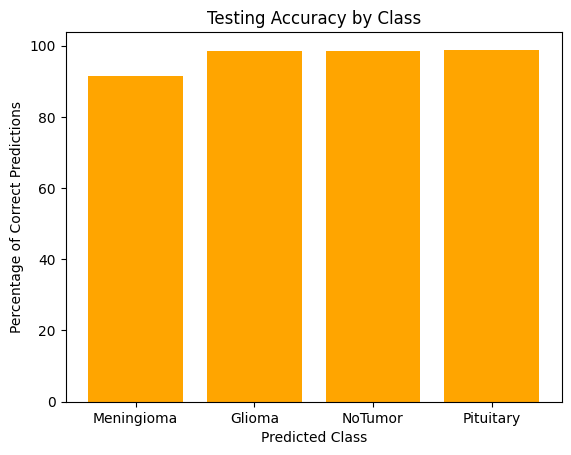

In [143]:
percentages = [np.mean(arr) * 100 for arr in dt.values()]

plt.bar(dt.keys(), percentages, color='orange')
plt.xlabel('Predicted Class')
plt.ylabel('Percentage of Correct Predictions')
plt.title('Testing Accuracy by Class')
plt.show()

In [145]:
dtr = {"Meningioma":[], "Glioma":[],"NoTumor":[], "Pituitary":[]}
count = 0
for image in train_x:
    trainImage = label_encoder.classes_[train_y[count]]
    Image = np.expand_dims(image, axis=0) 
    class_name = label_encoder.classes_[np.argmax(model.predict(Image))]
    if class_name == "Meningioma":
        if class_name == trainImage:
            dtr["Meningioma"].append(True)
        else:
            dtr["Meningioma"].append(False)
    if class_name == "Glioma":
        if class_name == trainImage:
            dtr["Glioma"].append(True)
        else:
            dtr["Glioma"].append(False)
    if class_name == "NoTumor":
        if class_name == trainImage:
            dtr["NoTumor"].append(True)
        else:
            dtr["NoTumor"].append(False)
    if class_name == "Pituitary":
        if class_name == trainImage:
            dtr["Pituitary"].append(True)
        else:
            dtr["Pituitary"].append(False)
    print(count)
            
    count = count + 1

1/1 [==============================] - 0s 392ms/step
0
1/1 [==============================] - 0s 407ms/step
1
1/1 [==============================] - 0s 401ms/step
2
1/1 [==============================] - 0s 429ms/step
3
1/1 [==============================] - 0s 391ms/step
4
1/1 [==============================] - 0s 403ms/step
5
1/1 [==============================] - 0s 395ms/step
6
1/1 [==============================] - 0s 456ms/step
7
1/1 [==============================] - 0s 426ms/step
8
1/1 [==============================] - 0s 415ms/step
9
1/1 [==============================] - 0s 466ms/step
10
1/1 [==============================] - 0s 421ms/step
11
1/1 [==============================] - 0s 449ms/step
12
1/1 [==============================] - 0s 380ms/step
13
1/1 [==============================] - 0s 379ms/step
14
1/1 [==============================] - 0s 381ms/step
15
1/1 [==============================] - 0s 417ms/step
16
1/1 [==============================] - 0s 403ms/step
17
1/

1/1 [==============================] - 0s 387ms/step
288
1/1 [==============================] - 0s 400ms/step
289
1/1 [==============================] - 0s 387ms/step
290
1/1 [==============================] - 0s 391ms/step
291
1/1 [==============================] - 0s 399ms/step
292
1/1 [==============================] - 0s 424ms/step
293
1/1 [==============================] - 0s 368ms/step
294
1/1 [==============================] - 0s 424ms/step
295
1/1 [==============================] - 0s 388ms/step
296
1/1 [==============================] - 0s 406ms/step
297
1/1 [==============================] - 0s 418ms/step
298
1/1 [==============================] - 0s 373ms/step
299
1/1 [==============================] - 0s 415ms/step
300
1/1 [==============================] - 0s 376ms/step
301
1/1 [==============================] - 0s 354ms/step
302
1/1 [==============================] - 0s 381ms/step
303
1/1 [==============================] - 0s 384ms/step
304
1/1 [==========================

1/1 [==============================] - 0s 360ms/step
574
1/1 [==============================] - 0s 392ms/step
575
1/1 [==============================] - 0s 381ms/step
576
1/1 [==============================] - 0s 402ms/step
577
1/1 [==============================] - 0s 466ms/step
578
1/1 [==============================] - 0s 369ms/step
579
1/1 [==============================] - 0s 411ms/step
580
1/1 [==============================] - 0s 388ms/step
581
1/1 [==============================] - 0s 452ms/step
582
1/1 [==============================] - 0s 438ms/step
583
1/1 [==============================] - 0s 422ms/step
584
1/1 [==============================] - 0s 387ms/step
585
1/1 [==============================] - 0s 454ms/step
586
1/1 [==============================] - 0s 362ms/step
587
1/1 [==============================] - 0s 425ms/step
588
1/1 [==============================] - 0s 388ms/step
589
1/1 [==============================] - 0s 374ms/step
590
1/1 [==========================

1/1 [==============================] - 0s 411ms/step
860
1/1 [==============================] - 0s 400ms/step
861
1/1 [==============================] - 0s 406ms/step
862
1/1 [==============================] - 0s 387ms/step
863
1/1 [==============================] - 0s 405ms/step
864
1/1 [==============================] - 0s 419ms/step
865
1/1 [==============================] - 0s 443ms/step
866
1/1 [==============================] - 0s 365ms/step
867
1/1 [==============================] - 0s 406ms/step
868
1/1 [==============================] - 0s 357ms/step
869
1/1 [==============================] - 0s 437ms/step
870
1/1 [==============================] - 0s 388ms/step
871
1/1 [==============================] - 0s 394ms/step
872
1/1 [==============================] - 0s 423ms/step
873
1/1 [==============================] - 0s 424ms/step
874
1/1 [==============================] - 0s 428ms/step
875
1/1 [==============================] - 0s 398ms/step
876
1/1 [==========================

1/1 [==============================] - 0s 476ms/step
1144
1/1 [==============================] - 0s 429ms/step
1145
1/1 [==============================] - 0s 412ms/step
1146
1/1 [==============================] - 0s 405ms/step
1147
1/1 [==============================] - 0s 430ms/step
1148
1/1 [==============================] - 0s 426ms/step
1149
1/1 [==============================] - 0s 408ms/step
1150
1/1 [==============================] - 0s 436ms/step
1151
1/1 [==============================] - 0s 417ms/step
1152
1/1 [==============================] - 0s 417ms/step
1153
1/1 [==============================] - 0s 446ms/step
1154
1/1 [==============================] - 0s 439ms/step
1155
1/1 [==============================] - 0s 442ms/step
1156
1/1 [==============================] - 0s 448ms/step
1157
1/1 [==============================] - 0s 433ms/step
1158
1/1 [==============================] - 0s 430ms/step
1159
1/1 [==============================] - 0s 422ms/step
1160
1/1 [=========

1/1 [==============================] - 0s 479ms/step
1426
1/1 [==============================] - 1s 524ms/step
1427
1/1 [==============================] - 0s 419ms/step
1428
1/1 [==============================] - 0s 451ms/step
1429
1/1 [==============================] - 0s 455ms/step
1430
1/1 [==============================] - 1s 545ms/step
1431
1/1 [==============================] - 0s 495ms/step
1432
1/1 [==============================] - 1s 505ms/step
1433
1/1 [==============================] - 0s 499ms/step
1434
1/1 [==============================] - 1s 515ms/step
1435
1/1 [==============================] - 1s 537ms/step
1436
1/1 [==============================] - 1s 526ms/step
1437
1/1 [==============================] - 1s 500ms/step
1438
1/1 [==============================] - 1s 526ms/step
1439
1/1 [==============================] - 0s 459ms/step
1440
1/1 [==============================] - 1s 532ms/step
1441
1/1 [==============================] - 1s 515ms/step
1442
1/1 [=========

1/1 [==============================] - 1s 504ms/step
1708
1/1 [==============================] - 0s 489ms/step
1709
1/1 [==============================] - 1s 543ms/step
1710
1/1 [==============================] - 1s 501ms/step
1711
1/1 [==============================] - 0s 495ms/step
1712
1/1 [==============================] - 1s 542ms/step
1713
1/1 [==============================] - 0s 492ms/step
1714
1/1 [==============================] - 1s 526ms/step
1715
1/1 [==============================] - 0s 487ms/step
1716
1/1 [==============================] - 1s 532ms/step
1717
1/1 [==============================] - 0s 497ms/step
1718
1/1 [==============================] - 1s 530ms/step
1719
1/1 [==============================] - 1s 513ms/step
1720
1/1 [==============================] - 0s 486ms/step
1721
1/1 [==============================] - 0s 488ms/step
1722
1/1 [==============================] - 1s 502ms/step
1723
1/1 [==============================] - 1s 532ms/step
1724
1/1 [=========

1/1 [==============================] - 1s 507ms/step
1990
1/1 [==============================] - 0s 499ms/step
1991
1/1 [==============================] - 1s 537ms/step
1992
1/1 [==============================] - 1s 530ms/step
1993
1/1 [==============================] - 0s 487ms/step
1994
1/1 [==============================] - 1s 522ms/step
1995
1/1 [==============================] - 0s 461ms/step
1996
1/1 [==============================] - 1s 513ms/step
1997
1/1 [==============================] - 0s 474ms/step
1998
1/1 [==============================] - 0s 487ms/step
1999
1/1 [==============================] - 1s 507ms/step
2000
1/1 [==============================] - 1s 504ms/step
2001
1/1 [==============================] - 0s 485ms/step
2002
1/1 [==============================] - 1s 513ms/step
2003
1/1 [==============================] - 1s 502ms/step
2004
1/1 [==============================] - 0s 496ms/step
2005
1/1 [==============================] - 0s 489ms/step
2006
1/1 [=========

1/1 [==============================] - 1s 561ms/step
2272
1/1 [==============================] - 1s 585ms/step
2273
1/1 [==============================] - 1s 682ms/step
2274
1/1 [==============================] - 1s 620ms/step
2275
1/1 [==============================] - 1s 620ms/step
2276
1/1 [==============================] - 1s 630ms/step
2277
1/1 [==============================] - 1s 569ms/step
2278
1/1 [==============================] - 1s 653ms/step
2279
1/1 [==============================] - 1s 586ms/step
2280
1/1 [==============================] - 1s 635ms/step
2281
1/1 [==============================] - 1s 682ms/step
2282
1/1 [==============================] - 1s 599ms/step
2283
1/1 [==============================] - 1s 620ms/step
2284
1/1 [==============================] - 1s 606ms/step
2285
1/1 [==============================] - 1s 689ms/step
2286
1/1 [==============================] - 1s 582ms/step
2287
1/1 [==============================] - 1s 588ms/step
2288
1/1 [=========

1/1 [==============================] - 1s 609ms/step
2554
1/1 [==============================] - 1s 595ms/step
2555
1/1 [==============================] - 1s 594ms/step
2556
1/1 [==============================] - 1s 530ms/step
2557
1/1 [==============================] - 1s 596ms/step
2558
1/1 [==============================] - 1s 558ms/step
2559
1/1 [==============================] - 1s 598ms/step
2560
1/1 [==============================] - 1s 578ms/step
2561
1/1 [==============================] - 1s 554ms/step
2562
1/1 [==============================] - 1s 525ms/step
2563
1/1 [==============================] - 1s 565ms/step
2564
1/1 [==============================] - 1s 572ms/step
2565
1/1 [==============================] - 1s 569ms/step
2566
1/1 [==============================] - 1s 586ms/step
2567
1/1 [==============================] - 1s 570ms/step
2568
1/1 [==============================] - 1s 542ms/step
2569
1/1 [==============================] - 1s 560ms/step
2570
1/1 [=========

1/1 [==============================] - 1s 516ms/step
2836
1/1 [==============================] - 0s 477ms/step
2837
1/1 [==============================] - 0s 481ms/step
2838
1/1 [==============================] - 0s 476ms/step
2839
1/1 [==============================] - 1s 514ms/step
2840
1/1 [==============================] - 1s 521ms/step
2841
1/1 [==============================] - 0s 486ms/step
2842
1/1 [==============================] - 0s 488ms/step
2843
1/1 [==============================] - 0s 479ms/step
2844
1/1 [==============================] - 1s 525ms/step
2845
1/1 [==============================] - 0s 498ms/step
2846
1/1 [==============================] - 1s 505ms/step
2847
1/1 [==============================] - 1s 501ms/step
2848
1/1 [==============================] - 1s 535ms/step
2849
1/1 [==============================] - 0s 478ms/step
2850
1/1 [==============================] - 0s 475ms/step
2851
1/1 [==============================] - 0s 476ms/step
2852
1/1 [=========

1/1 [==============================] - 1s 505ms/step
3118
1/1 [==============================] - 1s 504ms/step
3119
1/1 [==============================] - 1s 520ms/step
3120
1/1 [==============================] - 1s 551ms/step
3121
1/1 [==============================] - 1s 505ms/step
3122
1/1 [==============================] - 0s 475ms/step
3123
1/1 [==============================] - 0s 472ms/step
3124
1/1 [==============================] - 1s 506ms/step
3125
1/1 [==============================] - 0s 486ms/step
3126
1/1 [==============================] - 1s 552ms/step
3127
1/1 [==============================] - 0s 487ms/step
3128
1/1 [==============================] - 1s 501ms/step
3129
1/1 [==============================] - 1s 504ms/step
3130
1/1 [==============================] - 0s 457ms/step
3131
1/1 [==============================] - 0s 487ms/step
3132
1/1 [==============================] - 1s 504ms/step
3133
1/1 [==============================] - 1s 530ms/step
3134
1/1 [=========

1/1 [==============================] - 0s 472ms/step
3400
1/1 [==============================] - 0s 472ms/step
3401
1/1 [==============================] - 1s 519ms/step
3402
1/1 [==============================] - 1s 503ms/step
3403
1/1 [==============================] - 0s 487ms/step
3404
1/1 [==============================] - 1s 504ms/step
3405
1/1 [==============================] - 1s 519ms/step
3406
1/1 [==============================] - 1s 503ms/step
3407
1/1 [==============================] - 0s 473ms/step
3408
1/1 [==============================] - 1s 503ms/step
3409
1/1 [==============================] - 1s 502ms/step
3410
1/1 [==============================] - 0s 471ms/step
3411
1/1 [==============================] - 0s 488ms/step
3412
1/1 [==============================] - 0s 456ms/step
3413
1/1 [==============================] - 0s 473ms/step
3414
1/1 [==============================] - 0s 487ms/step
3415
1/1 [==============================] - 0s 472ms/step
3416
1/1 [=========

1/1 [==============================] - 0s 473ms/step
3682
1/1 [==============================] - 0s 481ms/step
3683
1/1 [==============================] - 1s 521ms/step
3684
1/1 [==============================] - 0s 459ms/step
3685
1/1 [==============================] - 1s 504ms/step
3686
1/1 [==============================] - 1s 518ms/step
3687
1/1 [==============================] - 0s 488ms/step
3688
1/1 [==============================] - 1s 549ms/step
3689
1/1 [==============================] - 1s 503ms/step
3690
1/1 [==============================] - 1s 525ms/step
3691
1/1 [==============================] - 0s 472ms/step
3692
1/1 [==============================] - 1s 507ms/step
3693
1/1 [==============================] - 0s 489ms/step
3694
1/1 [==============================] - 1s 505ms/step
3695
1/1 [==============================] - 1s 521ms/step
3696
1/1 [==============================] - 1s 535ms/step
3697
1/1 [==============================] - 0s 460ms/step
3698
1/1 [=========

1/1 [==============================] - 1s 503ms/step
3964
1/1 [==============================] - 1s 519ms/step
3965
1/1 [==============================] - 1s 534ms/step
3966
1/1 [==============================] - 1s 535ms/step
3967
1/1 [==============================] - 0s 488ms/step
3968
1/1 [==============================] - 1s 504ms/step
3969
1/1 [==============================] - 1s 519ms/step
3970
1/1 [==============================] - 1s 520ms/step
3971
1/1 [==============================] - 1s 509ms/step
3972
1/1 [==============================] - 1s 519ms/step
3973
1/1 [==============================] - 1s 519ms/step
3974
1/1 [==============================] - 1s 519ms/step
3975
1/1 [==============================] - 1s 502ms/step
3976
1/1 [==============================] - 1s 519ms/step
3977
1/1 [==============================] - 1s 519ms/step
3978
1/1 [==============================] - 0s 497ms/step
3979
1/1 [==============================] - 1s 504ms/step
3980
1/1 [=========

1/1 [==============================] - 1s 519ms/step
4246
1/1 [==============================] - 1s 504ms/step
4247
1/1 [==============================] - 1s 503ms/step
4248
1/1 [==============================] - 1s 504ms/step
4249
1/1 [==============================] - 1s 518ms/step
4250
1/1 [==============================] - 0s 488ms/step
4251
1/1 [==============================] - 1s 519ms/step
4252
1/1 [==============================] - 1s 518ms/step
4253
1/1 [==============================] - 1s 535ms/step
4254
1/1 [==============================] - 1s 520ms/step
4255
1/1 [==============================] - 1s 520ms/step
4256
1/1 [==============================] - 1s 519ms/step
4257
1/1 [==============================] - 1s 503ms/step
4258
1/1 [==============================] - 1s 504ms/step
4259
1/1 [==============================] - 0s 473ms/step
4260
1/1 [==============================] - 1s 504ms/step
4261
1/1 [==============================] - 1s 511ms/step
4262
1/1 [=========

1/1 [==============================] - 1s 501ms/step
4528
1/1 [==============================] - 0s 486ms/step
4529
1/1 [==============================] - 0s 487ms/step
4530
1/1 [==============================] - 1s 517ms/step
4531
1/1 [==============================] - 0s 471ms/step
4532
1/1 [==============================] - 1s 501ms/step
4533
1/1 [==============================] - 1s 502ms/step
4534
1/1 [==============================] - 0s 486ms/step
4535
1/1 [==============================] - 1s 545ms/step
4536
1/1 [==============================] - 0s 494ms/step
4537
1/1 [==============================] - 0s 483ms/step
4538
1/1 [==============================] - 1s 512ms/step
4539
1/1 [==============================] - 1s 502ms/step
4540
1/1 [==============================] - 0s 497ms/step
4541
1/1 [==============================] - 1s 510ms/step
4542
1/1 [==============================] - 0s 498ms/step
4543
1/1 [==============================] - 1s 515ms/step
4544
1/1 [=========

1/1 [==============================] - 1s 1s/step
4817
1/1 [==============================] - 1s 999ms/step
4818
1/1 [==============================] - 1s 1s/step
4819
1/1 [==============================] - 1s 1s/step
4820
1/1 [==============================] - 1s 1s/step
4821
1/1 [==============================] - 1s 1s/step
4822
1/1 [==============================] - 1s 1s/step
4823
1/1 [==============================] - 1s 1s/step
4824
1/1 [==============================] - 1s 1s/step
4825
1/1 [==============================] - 1s 1s/step
4826
1/1 [==============================] - 1s 1s/step
4827
1/1 [==============================] - 1s 1s/step
4828
1/1 [==============================] - 1s 1s/step
4829
1/1 [==============================] - 1s 1s/step
4830
1/1 [==============================] - 1s 1s/step
4831
1/1 [==============================] - 1s 994ms/step
4832
1/1 [==============================] - 1s 872ms/step
4833
1/1 [==============================] - 1s 736ms/step
483

1/1 [==============================] - 1s 906ms/step
5111
1/1 [==============================] - 1s 853ms/step
5112
1/1 [==============================] - 1s 864ms/step
5113
1/1 [==============================] - 1s 977ms/step
5114
1/1 [==============================] - 1s 1s/step
5115
1/1 [==============================] - 1s 884ms/step
5116
1/1 [==============================] - 1s 943ms/step
5117
1/1 [==============================] - 1s 937ms/step
5118
1/1 [==============================] - 1s 1s/step
5119
1/1 [==============================] - 1s 930ms/step
5120
1/1 [==============================] - 1s 899ms/step
5121
1/1 [==============================] - 1s 962ms/step
5122
1/1 [==============================] - 1s 913ms/step
5123
1/1 [==============================] - 1s 987ms/step
5124
1/1 [==============================] - 1s 1s/step
5125
1/1 [==============================] - 1s 883ms/step
5126
1/1 [==============================] - 1s 945ms/step
5127
1/1 [==================

1/1 [==============================] - 1s 1s/step
5396
1/1 [==============================] - 1s 1s/step
5397
1/1 [==============================] - 1s 1s/step
5398
1/1 [==============================] - 1s 1s/step
5399
1/1 [==============================] - 1s 1s/step
5400
1/1 [==============================] - 1s 1s/step
5401
1/1 [==============================] - 1s 1s/step
5402
1/1 [==============================] - 1s 1s/step
5403
1/1 [==============================] - 1s 1s/step
5404
1/1 [==============================] - 1s 1s/step
5405
1/1 [==============================] - 1s 1s/step
5406
1/1 [==============================] - 1s 1s/step
5407
1/1 [==============================] - 1s 1s/step
5408
1/1 [==============================] - 1s 1s/step
5409
1/1 [==============================] - 1s 1s/step
5410
1/1 [==============================] - 1s 1s/step
5411
1/1 [==============================] - 1s 1s/step
5412
1/1 [==============================] - 1s 1s/step
5413
1/1 [=====

1/1 [==============================] - 1s 1s/step
5693
1/1 [==============================] - 1s 1s/step
5694
1/1 [==============================] - 1s 1s/step
5695
1/1 [==============================] - 1s 1s/step
5696
1/1 [==============================] - 1s 1s/step
5697
1/1 [==============================] - 1s 1s/step
5698
1/1 [==============================] - 1s 1s/step
5699
1/1 [==============================] - 1s 1s/step
5700
1/1 [==============================] - 1s 1s/step
5701
1/1 [==============================] - 1s 1s/step
5702
1/1 [==============================] - 1s 1s/step
5703
1/1 [==============================] - 1s 1s/step
5704
1/1 [==============================] - 1s 1s/step
5705
1/1 [==============================] - 1s 1s/step
5706
1/1 [==============================] - 1s 1s/step
5707
1/1 [==============================] - 1s 1s/step
5708
1/1 [==============================] - 1s 1s/step
5709
1/1 [==============================] - 1s 1s/step
5710
1/1 [=====

5837
1/1 [==============================] - 1s 715ms/step
5838
1/1 [==============================] - 1s 704ms/step
5839
1/1 [==============================] - 1s 719ms/step
5840
1/1 [==============================] - 1s 723ms/step
5841
1/1 [==============================] - 1s 706ms/step
5842
1/1 [==============================] - 1s 712ms/step
5843
1/1 [==============================] - 1s 718ms/step
5844
1/1 [==============================] - 1s 715ms/step
5845
1/1 [==============================] - 1s 716ms/step
5846
1/1 [==============================] - 1s 718ms/step
5847
1/1 [==============================] - 1s 708ms/step
5848
1/1 [==============================] - 1s 725ms/step
5849
1/1 [==============================] - 1s 722ms/step
5850
1/1 [==============================] - 1s 722ms/step
5851
1/1 [==============================] - 1s 702ms/step
5852
1/1 [==============================] - 1s 718ms/step
5853
1/1 [==============================] - 1s 708ms/step
5854
1/1 [====

1/1 [==============================] - 1s 1s/step
6133
1/1 [==============================] - 1s 1s/step
6134
1/1 [==============================] - 1s 1s/step
6135
1/1 [==============================] - 1s 1s/step
6136
1/1 [==============================] - 1s 1s/step
6137
1/1 [==============================] - 2s 2s/step
6138
1/1 [==============================] - 1s 1s/step
6139
1/1 [==============================] - 1s 1s/step
6140
1/1 [==============================] - 1s 1s/step
6141
1/1 [==============================] - 1s 1s/step
6142
1/1 [==============================] - 1s 1s/step
6143
1/1 [==============================] - 1s 1s/step
6144
1/1 [==============================] - 2s 2s/step
6145
1/1 [==============================] - 1s 1s/step
6146
1/1 [==============================] - 1s 1s/step
6147
1/1 [==============================] - 1s 1s/step
6148
1/1 [==============================] - 1s 1s/step
6149
1/1 [==============================] - 1s 1s/step
6150
1/1 [=====

6280
1/1 [==============================] - 1s 832ms/step
6281
1/1 [==============================] - 1s 800ms/step
6282
1/1 [==============================] - 1s 768ms/step
6283
1/1 [==============================] - 1s 784ms/step
6284
1/1 [==============================] - 1s 769ms/step
6285
1/1 [==============================] - 1s 785ms/step
6286
1/1 [==============================] - 1s 784ms/step
6287
1/1 [==============================] - 1s 768ms/step
6288
1/1 [==============================] - 1s 776ms/step
6289
1/1 [==============================] - 1s 769ms/step
6290
1/1 [==============================] - 1s 768ms/step
6291
1/1 [==============================] - 1s 769ms/step
6292
1/1 [==============================] - 1s 781ms/step
6293
1/1 [==============================] - 1s 774ms/step
6294
1/1 [==============================] - 1s 784ms/step
6295
1/1 [==============================] - 1s 784ms/step
6296
1/1 [==============================] - 1s 768ms/step
6297
1/1 [====

1/1 [==============================] - 1s 1s/step
6574
1/1 [==============================] - 2s 2s/step
6575
1/1 [==============================] - 2s 2s/step
6576
1/1 [==============================] - 2s 2s/step
6577
1/1 [==============================] - 1s 1s/step
6578
1/1 [==============================] - 1s 1s/step
6579
1/1 [==============================] - 1s 1s/step
6580
1/1 [==============================] - 1s 1s/step
6581
1/1 [==============================] - 1s 1s/step
6582
1/1 [==============================] - 1s 1s/step
6583
1/1 [==============================] - 1s 1s/step
6584
1/1 [==============================] - 2s 2s/step
6585
1/1 [==============================] - 1s 1s/step
6586
1/1 [==============================] - 1s 1s/step
6587
1/1 [==============================] - 1s 1s/step
6588
1/1 [==============================] - 1s 1s/step
6589
1/1 [==============================] - 2s 2s/step
6590
1/1 [==============================] - 2s 2s/step
6591
1/1 [=====

1/1 [==============================] - 2s 2s/step
6723
1/1 [==============================] - 2s 2s/step
6724
1/1 [==============================] - 2s 2s/step
6725
1/1 [==============================] - 1s 1s/step
6726
1/1 [==============================] - 1s 1s/step
6727
1/1 [==============================] - 2s 2s/step
6728
1/1 [==============================] - 2s 2s/step
6729
1/1 [==============================] - 2s 2s/step
6730
1/1 [==============================] - 1s 1s/step
6731
1/1 [==============================] - 1s 1s/step
6732
1/1 [==============================] - 1s 1s/step
6733
1/1 [==============================] - 1s 1s/step
6734
1/1 [==============================] - 1s 1s/step
6735
1/1 [==============================] - 1s 1s/step
6736
1/1 [==============================] - 1s 1s/step
6737
1/1 [==============================] - 1s 1s/step
6738
1/1 [==============================] - 1s 1s/step
6739
1/1 [==============================] - 1s 1s/step
6740
1/1 [=====

6871
1/1 [==============================] - 2s 2s/step
6872
1/1 [==============================] - 2s 2s/step
6873
1/1 [==============================] - 2s 2s/step
6874
1/1 [==============================] - 2s 2s/step
6875
1/1 [==============================] - 1s 1s/step
6876
1/1 [==============================] - 2s 2s/step
6877
1/1 [==============================] - 2s 2s/step
6878
1/1 [==============================] - 2s 2s/step
6879
1/1 [==============================] - 2s 2s/step
6880
1/1 [==============================] - 2s 2s/step
6881
1/1 [==============================] - 2s 2s/step
6882
1/1 [==============================] - 2s 2s/step
6883
1/1 [==============================] - 2s 2s/step
6884
1/1 [==============================] - 2s 2s/step
6885
1/1 [==============================] - 2s 2s/step
6886
1/1 [==============================] - 2s 2s/step
6887
1/1 [==============================] - 2s 2s/step
6888
1/1 [==============================] - 2s 2s/step
6889
1/1 [

7020
1/1 [==============================] - 1s 1s/step
7021
1/1 [==============================] - 2s 2s/step
7022
1/1 [==============================] - 2s 2s/step
7023
1/1 [==============================] - 2s 2s/step
7024
1/1 [==============================] - 2s 2s/step
7025
1/1 [==============================] - 2s 2s/step
7026
1/1 [==============================] - 2s 2s/step
7027
1/1 [==============================] - 2s 2s/step
7028
1/1 [==============================] - 1s 1s/step
7029
1/1 [==============================] - 1s 1s/step
7030
1/1 [==============================] - 1s 812ms/step
7031
1/1 [==============================] - 1s 841ms/step
7032
1/1 [==============================] - 1s 849ms/step
7033
1/1 [==============================] - 1s 853ms/step
7034
1/1 [==============================] - 1s 854ms/step
7035
1/1 [==============================] - 1s 1s/step
7036
1/1 [==============================] - 1s 1s/step
7037
1/1 [==============================] - 2s 2s/

1/1 [==============================] - 2s 2s/step
7318
1/1 [==============================] - 1s 1s/step
7319
1/1 [==============================] - 1s 1s/step
7320
1/1 [==============================] - 1s 1s/step
7321
1/1 [==============================] - 2s 2s/step
7322
1/1 [==============================] - 1s 1s/step
7323
1/1 [==============================] - 1s 1s/step
7324
1/1 [==============================] - 2s 2s/step
7325
1/1 [==============================] - 1s 1s/step
7326
1/1 [==============================] - 2s 2s/step
7327
1/1 [==============================] - 2s 2s/step
7328
1/1 [==============================] - 2s 2s/step
7329
1/1 [==============================] - 2s 2s/step
7330
1/1 [==============================] - 1s 1s/step
7331
1/1 [==============================] - 2s 2s/step
7332
1/1 [==============================] - 1s 1s/step
7333
1/1 [==============================] - 2s 2s/step
7334
1/1 [==============================] - 2s 2s/step
7335
1/1 [=====

1/1 [==============================] - 1s 850ms/step
7466
1/1 [==============================] - 1s 866ms/step
7467
1/1 [==============================] - 1s 888ms/step
7468
1/1 [==============================] - 1s 879ms/step
7469
1/1 [==============================] - 1s 852ms/step
7470
1/1 [==============================] - 1s 833ms/step
7471
1/1 [==============================] - 1s 838ms/step
7472
1/1 [==============================] - 1s 827ms/step
7473
1/1 [==============================] - 1s 826ms/step
7474
1/1 [==============================] - 1s 880ms/step
7475
1/1 [==============================] - 1s 832ms/step
7476
1/1 [==============================] - 1s 833ms/step
7477
1/1 [==============================] - 1s 857ms/step
7478
1/1 [==============================] - 1s 903ms/step
7479
1/1 [==============================] - 1s 854ms/step
7480
1/1 [==============================] - 1s 890ms/step
7481
1/1 [==============================] - 1s 949ms/step
7482
1/1 [=========

7759
1/1 [==============================] - 2s 2s/step
7760
1/1 [==============================] - 1s 1s/step
7761
1/1 [==============================] - 2s 2s/step
7762
1/1 [==============================] - 2s 2s/step
7763
1/1 [==============================] - 2s 2s/step
7764
1/1 [==============================] - 2s 2s/step
7765
1/1 [==============================] - 2s 2s/step
7766
1/1 [==============================] - 1s 1s/step
7767
1/1 [==============================] - 1s 1s/step
7768
1/1 [==============================] - 2s 2s/step
7769
1/1 [==============================] - 2s 2s/step
7770
1/1 [==============================] - 2s 2s/step
7771
1/1 [==============================] - 2s 2s/step
7772
1/1 [==============================] - 2s 2s/step
7773
1/1 [==============================] - 2s 2s/step
7774
1/1 [==============================] - 2s 2s/step
7775
1/1 [==============================] - 1s 1s/step
7776
1/1 [==============================] - 2s 2s/step
7777
1/1 [

8056
1/1 [==============================] - 1s 1s/step
8057
1/1 [==============================] - 1s 1s/step
8058
1/1 [==============================] - 1s 1s/step
8059
1/1 [==============================] - 2s 2s/step
8060
1/1 [==============================] - 2s 2s/step
8061
1/1 [==============================] - 2s 2s/step
8062
1/1 [==============================] - 2s 2s/step
8063
1/1 [==============================] - 2s 2s/step
8064
1/1 [==============================] - 2s 2s/step
8065
1/1 [==============================] - 2s 2s/step
8066
1/1 [==============================] - 2s 2s/step
8067
1/1 [==============================] - 2s 2s/step
8068
1/1 [==============================] - 2s 2s/step
8069
1/1 [==============================] - 2s 2s/step
8070
1/1 [==============================] - 1s 1s/step
8071
1/1 [==============================] - 2s 2s/step
8072
1/1 [==============================] - 2s 2s/step
8073
1/1 [==============================] - 2s 2s/step
8074
1/1 [

8205
1/1 [==============================] - 2s 2s/step
8206
1/1 [==============================] - 2s 2s/step
8207
1/1 [==============================] - 1s 1s/step
8208
1/1 [==============================] - 2s 2s/step
8209
1/1 [==============================] - 2s 2s/step
8210
1/1 [==============================] - 1s 1s/step
8211
1/1 [==============================] - 2s 2s/step
8212
1/1 [==============================] - 2s 2s/step
8213
1/1 [==============================] - 2s 2s/step
8214
1/1 [==============================] - 1s 1s/step
8215
1/1 [==============================] - 1s 1s/step
8216
1/1 [==============================] - 1s 1s/step
8217
1/1 [==============================] - 1s 1s/step
8218
1/1 [==============================] - 1s 1s/step
8219
1/1 [==============================] - 2s 2s/step
8220
1/1 [==============================] - 2s 2s/step
8221
1/1 [==============================] - 1s 1s/step
8222
1/1 [==============================] - 1s 1s/step
8223
1/1 [

8354
1/1 [==============================] - 2s 2s/step
8355
1/1 [==============================] - 1s 1s/step
8356
1/1 [==============================] - 1s 1s/step
8357
1/1 [==============================] - 2s 2s/step
8358
1/1 [==============================] - 2s 2s/step
8359
1/1 [==============================] - 2s 2s/step
8360
1/1 [==============================] - 2s 2s/step
8361
1/1 [==============================] - 2s 2s/step
8362
1/1 [==============================] - 2s 2s/step
8363
1/1 [==============================] - 2s 2s/step
8364
1/1 [==============================] - 1s 1s/step
8365
1/1 [==============================] - 1s 1s/step
8366
1/1 [==============================] - 1s 1s/step
8367
1/1 [==============================] - 1s 1s/step
8368
1/1 [==============================] - 2s 2s/step
8369
1/1 [==============================] - 2s 2s/step
8370
1/1 [==============================] - 2s 2s/step
8371
1/1 [==============================] - 1s 1s/step
8372
1/1 [

8503
1/1 [==============================] - 2s 2s/step
8504
1/1 [==============================] - 2s 2s/step
8505
1/1 [==============================] - 2s 2s/step
8506
1/1 [==============================] - 2s 2s/step
8507
1/1 [==============================] - 2s 2s/step
8508
1/1 [==============================] - 1s 1s/step
8509
1/1 [==============================] - 2s 2s/step
8510
1/1 [==============================] - 2s 2s/step
8511
1/1 [==============================] - 2s 2s/step
8512
1/1 [==============================] - 1s 1s/step
8513
1/1 [==============================] - 1s 1s/step
8514
1/1 [==============================] - 2s 2s/step
8515
1/1 [==============================] - 1s 1s/step
8516
1/1 [==============================] - 2s 2s/step
8517
1/1 [==============================] - 1s 1s/step
8518
1/1 [==============================] - 1s 1s/step
8519
1/1 [==============================] - 1s 1s/step
8520
1/1 [==============================] - 2s 2s/step
8521
1/1 [

8652
1/1 [==============================] - 2s 2s/step
8653
1/1 [==============================] - 1s 1s/step
8654
1/1 [==============================] - 2s 2s/step
8655
1/1 [==============================] - 2s 2s/step
8656
1/1 [==============================] - 2s 2s/step
8657
1/1 [==============================] - 1s 1s/step
8658
1/1 [==============================] - 2s 2s/step
8659
1/1 [==============================] - 1s 1s/step
8660
1/1 [==============================] - 1s 1s/step
8661
1/1 [==============================] - 1s 1s/step
8662
1/1 [==============================] - 1s 1s/step
8663
1/1 [==============================] - 1s 1s/step
8664
1/1 [==============================] - 1s 1s/step
8665
1/1 [==============================] - 1s 1s/step
8666
1/1 [==============================] - 1s 1s/step
8667
1/1 [==============================] - 1s 1s/step
8668
1/1 [==============================] - 1s 1s/step
8669
1/1 [==============================] - 1s 1s/step
8670
1/1 [

8801
1/1 [==============================] - 2s 2s/step
8802
1/1 [==============================] - 2s 2s/step
8803
1/1 [==============================] - 2s 2s/step
8804
1/1 [==============================] - 1s 1s/step
8805
1/1 [==============================] - 1s 1s/step
8806
1/1 [==============================] - 1s 1s/step
8807
1/1 [==============================] - 2s 2s/step
8808
1/1 [==============================] - 1s 1s/step
8809
1/1 [==============================] - 2s 2s/step
8810
1/1 [==============================] - 2s 2s/step
8811
1/1 [==============================] - 2s 2s/step
8812
1/1 [==============================] - 2s 2s/step
8813
1/1 [==============================] - 2s 2s/step
8814
1/1 [==============================] - 2s 2s/step
8815
1/1 [==============================] - 2s 2s/step
8816
1/1 [==============================] - 2s 2s/step
8817
1/1 [==============================] - 1s 1s/step
8818
1/1 [==============================] - 1s 1s/step
8819
1/1 [

8950
1/1 [==============================] - 1s 1s/step
8951
1/1 [==============================] - 2s 2s/step
8952
1/1 [==============================] - 1s 1s/step
8953
1/1 [==============================] - 1s 1s/step
8954
1/1 [==============================] - 2s 2s/step
8955
1/1 [==============================] - 2s 2s/step
8956
1/1 [==============================] - 2s 2s/step
8957
1/1 [==============================] - 2s 2s/step
8958
1/1 [==============================] - 1s 1s/step
8959
1/1 [==============================] - 1s 1s/step
8960
1/1 [==============================] - 2s 2s/step
8961
1/1 [==============================] - 1s 1s/step
8962
1/1 [==============================] - 1s 1s/step
8963
1/1 [==============================] - 2s 2s/step
8964
1/1 [==============================] - 1s 1s/step
8965
1/1 [==============================] - 1s 1s/step
8966
1/1 [==============================] - 1s 1s/step
8967
1/1 [==============================] - 1s 1s/step
8968
1/1 [

9099
1/1 [==============================] - 1s 1s/step
9100
1/1 [==============================] - 1s 1s/step
9101
1/1 [==============================] - 1s 1s/step
9102
1/1 [==============================] - 1s 1s/step
9103
1/1 [==============================] - 1s 1s/step
9104
1/1 [==============================] - 1s 1s/step
9105
1/1 [==============================] - 2s 2s/step
9106
1/1 [==============================] - 2s 2s/step
9107
1/1 [==============================] - 2s 2s/step
9108
1/1 [==============================] - 1s 1s/step
9109
1/1 [==============================] - 2s 2s/step
9110
1/1 [==============================] - 1s 1s/step
9111
1/1 [==============================] - 2s 2s/step
9112
1/1 [==============================] - 1s 1s/step
9113
1/1 [==============================] - 2s 2s/step
9114
1/1 [==============================] - 2s 2s/step
9115
1/1 [==============================] - 2s 2s/step
9116
1/1 [==============================] - 2s 2s/step
9117
1/1 [

9248
1/1 [==============================] - 2s 2s/step
9249
1/1 [==============================] - 2s 2s/step
9250
1/1 [==============================] - 2s 2s/step
9251
1/1 [==============================] - 2s 2s/step
9252
1/1 [==============================] - 2s 2s/step
9253
1/1 [==============================] - 2s 2s/step
9254
1/1 [==============================] - 2s 2s/step
9255
1/1 [==============================] - 2s 2s/step
9256
1/1 [==============================] - 2s 2s/step
9257
1/1 [==============================] - 2s 2s/step
9258
1/1 [==============================] - 2s 2s/step
9259
1/1 [==============================] - 2s 2s/step
9260
1/1 [==============================] - 2s 2s/step
9261
1/1 [==============================] - 2s 2s/step
9262
1/1 [==============================] - 2s 2s/step
9263
1/1 [==============================] - 2s 2s/step
9264
1/1 [==============================] - 2s 2s/step
9265
1/1 [==============================] - 2s 2s/step
9266
1/1 [

9397
1/1 [==============================] - 2s 2s/step
9398
1/1 [==============================] - 2s 2s/step
9399
1/1 [==============================] - 2s 2s/step
9400
1/1 [==============================] - 2s 2s/step
9401
1/1 [==============================] - 2s 2s/step
9402
1/1 [==============================] - 2s 2s/step
9403
1/1 [==============================] - 2s 2s/step
9404
1/1 [==============================] - 2s 2s/step
9405
1/1 [==============================] - 2s 2s/step
9406
1/1 [==============================] - 2s 2s/step
9407
1/1 [==============================] - 2s 2s/step
9408
1/1 [==============================] - 2s 2s/step
9409
1/1 [==============================] - 2s 2s/step
9410
1/1 [==============================] - 2s 2s/step
9411
1/1 [==============================] - 2s 2s/step
9412
1/1 [==============================] - 2s 2s/step
9413
1/1 [==============================] - 2s 2s/step
9414
1/1 [==============================] - 2s 2s/step
9415
1/1 [

9546
1/1 [==============================] - 2s 2s/step
9547
1/1 [==============================] - 2s 2s/step
9548
1/1 [==============================] - 2s 2s/step
9549
1/1 [==============================] - 2s 2s/step
9550
1/1 [==============================] - 2s 2s/step
9551
1/1 [==============================] - 2s 2s/step
9552
1/1 [==============================] - 2s 2s/step
9553
1/1 [==============================] - 2s 2s/step
9554
1/1 [==============================] - 2s 2s/step
9555
1/1 [==============================] - 2s 2s/step
9556
1/1 [==============================] - 2s 2s/step
9557
1/1 [==============================] - 2s 2s/step
9558
1/1 [==============================] - 2s 2s/step
9559
1/1 [==============================] - 2s 2s/step
9560
1/1 [==============================] - 2s 2s/step
9561
1/1 [==============================] - 2s 2s/step
9562
1/1 [==============================] - 2s 2s/step
9563
1/1 [==============================] - 2s 2s/step
9564
1/1 [

9695
1/1 [==============================] - 2s 2s/step
9696
1/1 [==============================] - 2s 2s/step
9697
1/1 [==============================] - 2s 2s/step
9698
1/1 [==============================] - 2s 2s/step
9699
1/1 [==============================] - 2s 2s/step
9700
1/1 [==============================] - 2s 2s/step
9701
1/1 [==============================] - 2s 2s/step
9702
1/1 [==============================] - 2s 2s/step
9703
1/1 [==============================] - 2s 2s/step
9704
1/1 [==============================] - 2s 2s/step
9705
1/1 [==============================] - 2s 2s/step
9706
1/1 [==============================] - 2s 2s/step
9707
1/1 [==============================] - 2s 2s/step
9708
1/1 [==============================] - 2s 2s/step
9709
1/1 [==============================] - 2s 2s/step
9710
1/1 [==============================] - 2s 2s/step
9711
1/1 [==============================] - 2s 2s/step
9712
1/1 [==============================] - 2s 2s/step
9713
1/1 [

9844
1/1 [==============================] - 2s 2s/step
9845
1/1 [==============================] - 2s 2s/step
9846
1/1 [==============================] - 2s 2s/step
9847
1/1 [==============================] - 2s 2s/step
9848
1/1 [==============================] - 2s 2s/step
9849
1/1 [==============================] - 2s 2s/step
9850
1/1 [==============================] - 2s 2s/step
9851
1/1 [==============================] - 2s 2s/step
9852
1/1 [==============================] - 2s 2s/step
9853
1/1 [==============================] - 2s 2s/step
9854
1/1 [==============================] - 2s 2s/step
9855
1/1 [==============================] - 2s 2s/step
9856
1/1 [==============================] - 2s 2s/step
9857
1/1 [==============================] - 2s 2s/step
9858
1/1 [==============================] - 2s 2s/step
9859
1/1 [==============================] - 2s 2s/step
9860
1/1 [==============================] - 2s 2s/step
9861
1/1 [==============================] - 2s 2s/step
9862
1/1 [

9993
1/1 [==============================] - 2s 2s/step
9994
1/1 [==============================] - 2s 2s/step
9995
1/1 [==============================] - 2s 2s/step
9996
1/1 [==============================] - 2s 2s/step
9997
1/1 [==============================] - 2s 2s/step
9998
1/1 [==============================] - 2s 2s/step
9999
1/1 [==============================] - 2s 2s/step
10000
1/1 [==============================] - 2s 2s/step
10001
1/1 [==============================] - 2s 2s/step
10002
1/1 [==============================] - 2s 2s/step
10003
1/1 [==============================] - 2s 2s/step
10004
1/1 [==============================] - 2s 2s/step
10005
1/1 [==============================] - 2s 2s/step
10006
1/1 [==============================] - 2s 2s/step
10007
1/1 [==============================] - 2s 2s/step
10008
1/1 [==============================] - 2s 2s/step
10009
1/1 [==============================] - 2s 2s/step
10010
1/1 [==============================] - 2s 2s/step

1/1 [==============================] - 2s 2s/step
10286
1/1 [==============================] - 2s 2s/step
10287
1/1 [==============================] - 2s 2s/step
10288
1/1 [==============================] - 2s 2s/step
10289
1/1 [==============================] - 2s 2s/step
10290
1/1 [==============================] - 2s 2s/step
10291
1/1 [==============================] - 2s 2s/step
10292
1/1 [==============================] - 2s 2s/step
10293
1/1 [==============================] - 2s 2s/step
10294
1/1 [==============================] - 2s 2s/step
10295
1/1 [==============================] - 2s 2s/step
10296
1/1 [==============================] - 2s 2s/step
10297
1/1 [==============================] - 2s 2s/step
10298
1/1 [==============================] - 2s 2s/step
10299
1/1 [==============================] - 2s 2s/step
10300
1/1 [==============================] - 2s 2s/step
10301
1/1 [==============================] - 2s 2s/step
10302
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 2s 2s/step
10578
1/1 [==============================] - 2s 2s/step
10579
1/1 [==============================] - 2s 2s/step
10580
1/1 [==============================] - 2s 2s/step
10581
1/1 [==============================] - 2s 2s/step
10582
1/1 [==============================] - 2s 2s/step
10583
1/1 [==============================] - 2s 2s/step
10584
1/1 [==============================] - 2s 2s/step
10585
1/1 [==============================] - 2s 2s/step
10586
1/1 [==============================] - 2s 2s/step
10587
1/1 [==============================] - 2s 2s/step
10588
1/1 [==============================] - 2s 2s/step
10589
1/1 [==============================] - 2s 2s/step
10590
1/1 [==============================] - 2s 2s/step
10591
1/1 [==============================] - 2s 2s/step
10592
1/1 [==============================] - 2s 2s/step
10593
1/1 [==============================] - 2s 2s/step
10594
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 2s 2s/step
10870
1/1 [==============================] - 2s 2s/step
10871
1/1 [==============================] - 2s 2s/step
10872
1/1 [==============================] - 2s 2s/step
10873
1/1 [==============================] - 2s 2s/step
10874
1/1 [==============================] - 2s 2s/step
10875
1/1 [==============================] - 2s 2s/step
10876
1/1 [==============================] - 2s 2s/step
10877
1/1 [==============================] - 2s 2s/step
10878
1/1 [==============================] - 2s 2s/step
10879
1/1 [==============================] - 2s 2s/step
10880
1/1 [==============================] - 2s 2s/step
10881
1/1 [==============================] - 2s 2s/step
10882
1/1 [==============================] - 2s 2s/step
10883
1/1 [==============================] - 2s 2s/step
10884
1/1 [==============================] - 2s 2s/step
10885
1/1 [==============================] - 2s 2s/step
10886
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 2s 2s/step
11162
1/1 [==============================] - 2s 2s/step
11163
1/1 [==============================] - 2s 2s/step
11164
1/1 [==============================] - 2s 2s/step
11165
1/1 [==============================] - 2s 2s/step
11166
1/1 [==============================] - 2s 2s/step
11167
1/1 [==============================] - 2s 2s/step
11168
1/1 [==============================] - 2s 2s/step
11169
1/1 [==============================] - 2s 2s/step
11170
1/1 [==============================] - 2s 2s/step
11171
1/1 [==============================] - 2s 2s/step
11172
1/1 [==============================] - 2s 2s/step
11173
1/1 [==============================] - 2s 2s/step
11174
1/1 [==============================] - 2s 2s/step
11175
1/1 [==============================] - 2s 2s/step
11176
1/1 [==============================] - 2s 2s/step
11177
1/1 [==============================] - 2s 2s/step
11178
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 2s 2s/step
11454
1/1 [==============================] - 2s 2s/step
11455
1/1 [==============================] - 2s 2s/step
11456
1/1 [==============================] - 2s 2s/step
11457
1/1 [==============================] - 2s 2s/step
11458
1/1 [==============================] - 2s 2s/step
11459
1/1 [==============================] - 2s 2s/step
11460
1/1 [==============================] - 2s 2s/step
11461
1/1 [==============================] - 2s 2s/step
11462
1/1 [==============================] - 2s 2s/step
11463
1/1 [==============================] - 2s 2s/step
11464
1/1 [==============================] - 2s 2s/step
11465
1/1 [==============================] - 3s 3s/step
11466
1/1 [==============================] - 2s 2s/step
11467
1/1 [==============================] - 2s 2s/step
11468
1/1 [==============================] - 2s 2s/step
11469
1/1 [==============================] - 2s 2s/step
11470
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 2s 2s/step
11746
1/1 [==============================] - 2s 2s/step
11747
1/1 [==============================] - 2s 2s/step
11748
1/1 [==============================] - 2s 2s/step
11749
1/1 [==============================] - 2s 2s/step
11750
1/1 [==============================] - 2s 2s/step
11751
1/1 [==============================] - 2s 2s/step
11752
1/1 [==============================] - 2s 2s/step
11753
1/1 [==============================] - 2s 2s/step
11754
1/1 [==============================] - 2s 2s/step
11755
1/1 [==============================] - 2s 2s/step
11756
1/1 [==============================] - 2s 2s/step
11757
1/1 [==============================] - 2s 2s/step
11758
1/1 [==============================] - 2s 2s/step
11759
1/1 [==============================] - 2s 2s/step
11760
1/1 [==============================] - 2s 2s/step
11761
1/1 [==============================] - 2s 2s/step
11762
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 2s 2s/step
12038
1/1 [==============================] - 2s 2s/step
12039
1/1 [==============================] - 2s 2s/step
12040
1/1 [==============================] - 2s 2s/step
12041
1/1 [==============================] - 2s 2s/step
12042
1/1 [==============================] - 2s 2s/step
12043
1/1 [==============================] - 2s 2s/step
12044
1/1 [==============================] - 2s 2s/step
12045
1/1 [==============================] - 2s 2s/step
12046
1/1 [==============================] - 2s 2s/step
12047
1/1 [==============================] - 2s 2s/step
12048
1/1 [==============================] - 2s 2s/step
12049
1/1 [==============================] - 2s 2s/step
12050
1/1 [==============================] - 2s 2s/step
12051
1/1 [==============================] - 2s 2s/step
12052
1/1 [==============================] - 2s 2s/step
12053
1/1 [==============================] - 2s 2s/step
12054
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 2s 2s/step
12330
1/1 [==============================] - 2s 2s/step
12331
1/1 [==============================] - 2s 2s/step
12332
1/1 [==============================] - 2s 2s/step
12333
1/1 [==============================] - 2s 2s/step
12334
1/1 [==============================] - 2s 2s/step
12335
1/1 [==============================] - 2s 2s/step
12336
1/1 [==============================] - 2s 2s/step
12337
1/1 [==============================] - 2s 2s/step
12338
1/1 [==============================] - 2s 2s/step
12339
1/1 [==============================] - 2s 2s/step
12340
1/1 [==============================] - 2s 2s/step
12341
1/1 [==============================] - 2s 2s/step
12342
1/1 [==============================] - 2s 2s/step
12343
1/1 [==============================] - 2s 2s/step
12344
1/1 [==============================] - 2s 2s/step
12345
1/1 [==============================] - 2s 2s/step
12346
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 2s 2s/step
12622
1/1 [==============================] - 2s 2s/step
12623
1/1 [==============================] - 2s 2s/step
12624
1/1 [==============================] - 2s 2s/step
12625
1/1 [==============================] - 2s 2s/step
12626
1/1 [==============================] - 2s 2s/step
12627
1/1 [==============================] - 2s 2s/step
12628
1/1 [==============================] - 2s 2s/step
12629
1/1 [==============================] - 2s 2s/step
12630
1/1 [==============================] - 2s 2s/step
12631
1/1 [==============================] - 2s 2s/step
12632
1/1 [==============================] - 2s 2s/step
12633
1/1 [==============================] - 2s 2s/step
12634
1/1 [==============================] - 2s 2s/step
12635
1/1 [==============================] - 2s 2s/step
12636
1/1 [==============================] - 2s 2s/step
12637
1/1 [==============================] - 2s 2s/step
12638
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 2s 2s/step
12914
1/1 [==============================] - 2s 2s/step
12915
1/1 [==============================] - 2s 2s/step
12916
1/1 [==============================] - 2s 2s/step
12917
1/1 [==============================] - 2s 2s/step
12918
1/1 [==============================] - 2s 2s/step
12919
1/1 [==============================] - 2s 2s/step
12920
1/1 [==============================] - 2s 2s/step
12921
1/1 [==============================] - 2s 2s/step
12922
1/1 [==============================] - 2s 2s/step
12923
1/1 [==============================] - 2s 2s/step
12924
1/1 [==============================] - 2s 2s/step
12925
1/1 [==============================] - 2s 2s/step
12926
1/1 [==============================] - 2s 2s/step
12927
1/1 [==============================] - 2s 2s/step
12928
1/1 [==============================] - 2s 2s/step
12929
1/1 [==============================] - 2s 2s/step
12930
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 2s 2s/step
13206
1/1 [==============================] - 2s 2s/step
13207
1/1 [==============================] - 2s 2s/step
13208
1/1 [==============================] - 2s 2s/step
13209
1/1 [==============================] - 2s 2s/step
13210
1/1 [==============================] - 2s 2s/step
13211
1/1 [==============================] - 2s 2s/step
13212
1/1 [==============================] - 2s 2s/step
13213
1/1 [==============================] - 2s 2s/step
13214
1/1 [==============================] - 2s 2s/step
13215
1/1 [==============================] - 2s 2s/step
13216
1/1 [==============================] - 2s 2s/step
13217
1/1 [==============================] - 2s 2s/step
13218
1/1 [==============================] - 2s 2s/step
13219
1/1 [==============================] - 2s 2s/step
13220
1/1 [==============================] - 2s 2s/step
13221
1/1 [==============================] - 2s 2s/step
13222
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 2s 2s/step
13498
1/1 [==============================] - 2s 2s/step
13499
1/1 [==============================] - 2s 2s/step
13500
1/1 [==============================] - 2s 2s/step
13501
1/1 [==============================] - 2s 2s/step
13502
1/1 [==============================] - 2s 2s/step
13503
1/1 [==============================] - 2s 2s/step
13504
1/1 [==============================] - 2s 2s/step
13505
1/1 [==============================] - 2s 2s/step
13506
1/1 [==============================] - 2s 2s/step
13507
1/1 [==============================] - 2s 2s/step
13508
1/1 [==============================] - 2s 2s/step
13509
1/1 [==============================] - 2s 2s/step
13510
1/1 [==============================] - 2s 2s/step
13511
1/1 [==============================] - 2s 2s/step
13512
1/1 [==============================] - 2s 2s/step
13513
1/1 [==============================] - 2s 2s/step
13514
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 2s 2s/step
13790
1/1 [==============================] - 2s 2s/step
13791
1/1 [==============================] - 2s 2s/step
13792
1/1 [==============================] - 2s 2s/step
13793
1/1 [==============================] - 2s 2s/step
13794
1/1 [==============================] - 2s 2s/step
13795
1/1 [==============================] - 2s 2s/step
13796
1/1 [==============================] - 2s 2s/step
13797
1/1 [==============================] - 2s 2s/step
13798
1/1 [==============================] - 2s 2s/step
13799
1/1 [==============================] - 2s 2s/step
13800
1/1 [==============================] - 2s 2s/step
13801
1/1 [==============================] - 2s 2s/step
13802
1/1 [==============================] - 2s 2s/step
13803
1/1 [==============================] - 2s 2s/step
13804
1/1 [==============================] - 2s 2s/step
13805
1/1 [==============================] - 2s 2s/step
13806
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 2s 2s/step
14082
1/1 [==============================] - 2s 2s/step
14083
1/1 [==============================] - 2s 2s/step
14084
1/1 [==============================] - 2s 2s/step
14085
1/1 [==============================] - 2s 2s/step
14086
1/1 [==============================] - 2s 2s/step
14087
1/1 [==============================] - 2s 2s/step
14088
1/1 [==============================] - 2s 2s/step
14089
1/1 [==============================] - 2s 2s/step
14090
1/1 [==============================] - 2s 2s/step
14091
1/1 [==============================] - 2s 2s/step
14092
1/1 [==============================] - 2s 2s/step
14093
1/1 [==============================] - 2s 2s/step
14094
1/1 [==============================] - 2s 2s/step
14095
1/1 [==============================] - 2s 2s/step
14096
1/1 [==============================] - 2s 2s/step
14097
1/1 [==============================] - 2s 2s/step
14098
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 3s 3s/step
14374
1/1 [==============================] - 3s 3s/step
14375
1/1 [==============================] - 3s 3s/step
14376
1/1 [==============================] - 3s 3s/step
14377
1/1 [==============================] - 3s 3s/step
14378
1/1 [==============================] - 3s 3s/step
14379
1/1 [==============================] - 3s 3s/step
14380
1/1 [==============================] - 3s 3s/step
14381
1/1 [==============================] - 3s 3s/step
14382
1/1 [==============================] - 3s 3s/step
14383
1/1 [==============================] - 3s 3s/step
14384
1/1 [==============================] - 3s 3s/step
14385
1/1 [==============================] - 3s 3s/step
14386
1/1 [==============================] - 3s 3s/step
14387
1/1 [==============================] - 3s 3s/step
14388
1/1 [==============================] - 3s 3s/step
14389
1/1 [==============================] - 3s 3s/step
14390
1/1 [==============================] - 3s 3s/ste

1/1 [==============================] - 3s 3s/step
14666
1/1 [==============================] - 2s 2s/step
14667
1/1 [==============================] - 3s 3s/step
14668
1/1 [==============================] - 3s 3s/step
14669
1/1 [==============================] - 3s 3s/step
14670
1/1 [==============================] - 3s 3s/step
14671
1/1 [==============================] - 3s 3s/step
14672
1/1 [==============================] - 3s 3s/step
14673
1/1 [==============================] - 3s 3s/step
14674
1/1 [==============================] - 3s 3s/step
14675
1/1 [==============================] - 3s 3s/step
14676
1/1 [==============================] - 3s 3s/step
14677
1/1 [==============================] - 2s 2s/step
14678
1/1 [==============================] - 3s 3s/step
14679
1/1 [==============================] - 3s 3s/step
14680
1/1 [==============================] - 3s 3s/step
14681
1/1 [==============================] - 3s 3s/step
14682
1/1 [==============================] - 3s 3s/ste

1/1 [==============================] - 2s 2s/step
14958
1/1 [==============================] - 3s 3s/step
14959
1/1 [==============================] - 3s 3s/step
14960
1/1 [==============================] - 3s 3s/step
14961
1/1 [==============================] - 3s 3s/step
14962
1/1 [==============================] - 3s 3s/step
14963
1/1 [==============================] - 3s 3s/step
14964
1/1 [==============================] - 3s 3s/step
14965
1/1 [==============================] - 3s 3s/step
14966
1/1 [==============================] - 3s 3s/step
14967
1/1 [==============================] - 3s 3s/step
14968
1/1 [==============================] - 3s 3s/step
14969
1/1 [==============================] - 3s 3s/step
14970
1/1 [==============================] - 3s 3s/step
14971
1/1 [==============================] - 3s 3s/step
14972
1/1 [==============================] - 3s 3s/step
14973
1/1 [==============================] - 3s 3s/step
14974
1/1 [==============================] - 3s 3s/ste

1/1 [==============================] - 3s 3s/step
15250
1/1 [==============================] - 2s 2s/step
15251
1/1 [==============================] - 2s 2s/step
15252
1/1 [==============================] - 2s 2s/step
15253
1/1 [==============================] - 2s 2s/step
15254
1/1 [==============================] - 2s 2s/step
15255
1/1 [==============================] - 2s 2s/step
15256
1/1 [==============================] - 3s 3s/step
15257
1/1 [==============================] - 3s 3s/step
15258
1/1 [==============================] - 2s 2s/step
15259
1/1 [==============================] - 3s 3s/step
15260
1/1 [==============================] - 2s 2s/step
15261
1/1 [==============================] - 2s 2s/step
15262
1/1 [==============================] - 2s 2s/step
15263
1/1 [==============================] - 3s 3s/step
15264
1/1 [==============================] - 3s 3s/step
15265
1/1 [==============================] - 2s 2s/step
15266
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 3s 3s/step
15542
1/1 [==============================] - 2s 2s/step
15543
1/1 [==============================] - 2s 2s/step
15544
1/1 [==============================] - 3s 3s/step
15545
1/1 [==============================] - 3s 3s/step
15546
1/1 [==============================] - 3s 3s/step
15547
1/1 [==============================] - 2s 2s/step
15548
1/1 [==============================] - 2s 2s/step
15549
1/1 [==============================] - 2s 2s/step
15550
1/1 [==============================] - 3s 3s/step
15551
1/1 [==============================] - 3s 3s/step
15552
1/1 [==============================] - 3s 3s/step
15553
1/1 [==============================] - 3s 3s/step
15554
1/1 [==============================] - 3s 3s/step
15555
1/1 [==============================] - 3s 3s/step
15556
1/1 [==============================] - 3s 3s/step
15557
1/1 [==============================] - 3s 3s/step
15558
1/1 [==============================] - 3s 3s/ste

1/1 [==============================] - 3s 3s/step
15834
1/1 [==============================] - 3s 3s/step
15835
1/1 [==============================] - 3s 3s/step
15836
1/1 [==============================] - 2s 2s/step
15837
1/1 [==============================] - 3s 3s/step
15838
1/1 [==============================] - 3s 3s/step
15839
1/1 [==============================] - 2s 2s/step
15840
1/1 [==============================] - 3s 3s/step
15841
1/1 [==============================] - 2s 2s/step
15842
1/1 [==============================] - 3s 3s/step
15843
1/1 [==============================] - 3s 3s/step
15844
1/1 [==============================] - 3s 3s/step
15845
1/1 [==============================] - 2s 2s/step
15846
1/1 [==============================] - 2s 2s/step
15847
1/1 [==============================] - 3s 3s/step
15848
1/1 [==============================] - 3s 3s/step
15849
1/1 [==============================] - 3s 3s/step
15850
1/1 [==============================] - 3s 3s/ste

1/1 [==============================] - 3s 3s/step
16126
1/1 [==============================] - 3s 3s/step
16127
1/1 [==============================] - 3s 3s/step
16128
1/1 [==============================] - 3s 3s/step
16129
1/1 [==============================] - 3s 3s/step
16130
1/1 [==============================] - 3s 3s/step
16131
1/1 [==============================] - 3s 3s/step
16132
1/1 [==============================] - 3s 3s/step
16133
1/1 [==============================] - 3s 3s/step
16134
1/1 [==============================] - 3s 3s/step
16135
1/1 [==============================] - 2s 2s/step
16136
1/1 [==============================] - 2s 2s/step
16137
1/1 [==============================] - 3s 3s/step
16138
1/1 [==============================] - 2s 2s/step
16139
1/1 [==============================] - 2s 2s/step
16140
1/1 [==============================] - 2s 2s/step
16141
1/1 [==============================] - 2s 2s/step
16142
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 3s 3s/step
16418
1/1 [==============================] - 3s 3s/step
16419
1/1 [==============================] - 3s 3s/step
16420
1/1 [==============================] - 3s 3s/step
16421
1/1 [==============================] - 3s 3s/step
16422
1/1 [==============================] - 3s 3s/step
16423
1/1 [==============================] - 3s 3s/step
16424
1/1 [==============================] - 3s 3s/step
16425
1/1 [==============================] - 3s 3s/step
16426
1/1 [==============================] - 3s 3s/step
16427
1/1 [==============================] - 3s 3s/step
16428
1/1 [==============================] - 3s 3s/step
16429
1/1 [==============================] - 3s 3s/step
16430
1/1 [==============================] - 3s 3s/step
16431
1/1 [==============================] - 3s 3s/step
16432
1/1 [==============================] - 3s 3s/step
16433
1/1 [==============================] - 3s 3s/step
16434
1/1 [==============================] - 3s 3s/ste

1/1 [==============================] - 3s 3s/step
16710
1/1 [==============================] - 3s 3s/step
16711
1/1 [==============================] - 3s 3s/step
16712
1/1 [==============================] - 3s 3s/step
16713
1/1 [==============================] - 3s 3s/step
16714
1/1 [==============================] - 3s 3s/step
16715
1/1 [==============================] - 3s 3s/step
16716
1/1 [==============================] - 3s 3s/step
16717
1/1 [==============================] - 3s 3s/step
16718
1/1 [==============================] - 3s 3s/step
16719
1/1 [==============================] - 3s 3s/step
16720
1/1 [==============================] - 3s 3s/step
16721
1/1 [==============================] - 3s 3s/step
16722
1/1 [==============================] - 3s 3s/step
16723
1/1 [==============================] - 3s 3s/step
16724
1/1 [==============================] - 3s 3s/step
16725
1/1 [==============================] - 3s 3s/step
16726
1/1 [==============================] - 3s 3s/ste

1/1 [==============================] - 3s 3s/step
17002
1/1 [==============================] - 3s 3s/step
17003
1/1 [==============================] - 3s 3s/step
17004
1/1 [==============================] - 3s 3s/step
17005
1/1 [==============================] - 3s 3s/step
17006
1/1 [==============================] - 3s 3s/step
17007
1/1 [==============================] - 3s 3s/step
17008
1/1 [==============================] - 3s 3s/step
17009
1/1 [==============================] - 3s 3s/step
17010
1/1 [==============================] - 3s 3s/step
17011
1/1 [==============================] - 3s 3s/step
17012
1/1 [==============================] - 3s 3s/step
17013
1/1 [==============================] - 3s 3s/step
17014
1/1 [==============================] - 3s 3s/step
17015
1/1 [==============================] - 3s 3s/step
17016
1/1 [==============================] - 3s 3s/step
17017
1/1 [==============================] - 3s 3s/step
17018
1/1 [==============================] - 3s 3s/ste

1/1 [==============================] - 3s 3s/step
17294
1/1 [==============================] - 3s 3s/step
17295
1/1 [==============================] - 3s 3s/step
17296
1/1 [==============================] - 3s 3s/step
17297
1/1 [==============================] - 3s 3s/step
17298
1/1 [==============================] - 3s 3s/step
17299
1/1 [==============================] - 3s 3s/step
17300
1/1 [==============================] - 3s 3s/step
17301
1/1 [==============================] - 3s 3s/step
17302
1/1 [==============================] - 3s 3s/step
17303
1/1 [==============================] - 3s 3s/step
17304
1/1 [==============================] - 3s 3s/step
17305
1/1 [==============================] - 3s 3s/step
17306
1/1 [==============================] - 3s 3s/step
17307
1/1 [==============================] - 3s 3s/step
17308
1/1 [==============================] - 3s 3s/step
17309
1/1 [==============================] - 3s 3s/step
17310
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 3s 3s/step
17586
1/1 [==============================] - 3s 3s/step
17587
1/1 [==============================] - 3s 3s/step
17588
1/1 [==============================] - 3s 3s/step
17589
1/1 [==============================] - 3s 3s/step
17590
1/1 [==============================] - 3s 3s/step
17591
1/1 [==============================] - 3s 3s/step
17592
1/1 [==============================] - 3s 3s/step
17593
1/1 [==============================] - 3s 3s/step
17594
1/1 [==============================] - 3s 3s/step
17595
1/1 [==============================] - 3s 3s/step
17596
1/1 [==============================] - 3s 3s/step
17597
1/1 [==============================] - 3s 3s/step
17598
1/1 [==============================] - 3s 3s/step
17599
1/1 [==============================] - 3s 3s/step
17600
1/1 [==============================] - 3s 3s/step
17601
1/1 [==============================] - 3s 3s/step
17602
1/1 [==============================] - 3s 3s/ste

1/1 [==============================] - 3s 3s/step
17878
1/1 [==============================] - 3s 3s/step
17879
1/1 [==============================] - 3s 3s/step
17880
1/1 [==============================] - 3s 3s/step
17881
1/1 [==============================] - 3s 3s/step
17882
1/1 [==============================] - 3s 3s/step
17883
1/1 [==============================] - 3s 3s/step
17884
1/1 [==============================] - 3s 3s/step
17885
1/1 [==============================] - 3s 3s/step
17886
1/1 [==============================] - 3s 3s/step
17887
1/1 [==============================] - 3s 3s/step
17888
1/1 [==============================] - 3s 3s/step
17889
1/1 [==============================] - 3s 3s/step
17890
1/1 [==============================] - 3s 3s/step
17891
1/1 [==============================] - 3s 3s/step
17892
1/1 [==============================] - 3s 3s/step
17893
1/1 [==============================] - 3s 3s/step
17894
1/1 [==============================] - 3s 3s/ste

1/1 [==============================] - 3s 3s/step
18170
1/1 [==============================] - 3s 3s/step
18171
1/1 [==============================] - 3s 3s/step
18172
1/1 [==============================] - 3s 3s/step
18173
1/1 [==============================] - 3s 3s/step
18174
1/1 [==============================] - 3s 3s/step
18175
1/1 [==============================] - 3s 3s/step
18176
1/1 [==============================] - 3s 3s/step
18177
1/1 [==============================] - 3s 3s/step
18178
1/1 [==============================] - 3s 3s/step
18179
1/1 [==============================] - 3s 3s/step
18180
1/1 [==============================] - 3s 3s/step
18181
1/1 [==============================] - 3s 3s/step
18182
1/1 [==============================] - 3s 3s/step
18183
1/1 [==============================] - 3s 3s/step
18184
1/1 [==============================] - 3s 3s/step
18185
1/1 [==============================] - 2s 2s/step
18186
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 3s 3s/step
18462
1/1 [==============================] - 3s 3s/step
18463
1/1 [==============================] - 3s 3s/step
18464
1/1 [==============================] - 3s 3s/step
18465
1/1 [==============================] - 3s 3s/step
18466
1/1 [==============================] - 3s 3s/step
18467
1/1 [==============================] - 3s 3s/step
18468
1/1 [==============================] - 3s 3s/step
18469
1/1 [==============================] - 3s 3s/step
18470
1/1 [==============================] - 3s 3s/step
18471
1/1 [==============================] - 3s 3s/step
18472
1/1 [==============================] - 3s 3s/step
18473
1/1 [==============================] - 3s 3s/step
18474
1/1 [==============================] - 3s 3s/step
18475
1/1 [==============================] - 3s 3s/step
18476
1/1 [==============================] - 3s 3s/step
18477
1/1 [==============================] - 3s 3s/step
18478
1/1 [==============================] - 3s 3s/ste

1/1 [==============================] - 5s 5s/step
18754
1/1 [==============================] - 5s 5s/step
18755
1/1 [==============================] - 5s 5s/step
18756
1/1 [==============================] - 5s 5s/step
18757
1/1 [==============================] - 5s 5s/step
18758
1/1 [==============================] - 5s 5s/step
18759
1/1 [==============================] - 5s 5s/step
18760
1/1 [==============================] - 5s 5s/step
18761
1/1 [==============================] - 5s 5s/step
18762
1/1 [==============================] - 5s 5s/step
18763
1/1 [==============================] - 5s 5s/step
18764
1/1 [==============================] - 5s 5s/step
18765
1/1 [==============================] - 5s 5s/step
18766
1/1 [==============================] - 5s 5s/step
18767
1/1 [==============================] - 5s 5s/step
18768
1/1 [==============================] - 6s 6s/step
18769
1/1 [==============================] - 5s 5s/step
18770
1/1 [==============================] - 5s 5s/ste

1/1 [==============================] - 5s 5s/step
19046
1/1 [==============================] - 5s 5s/step
19047
1/1 [==============================] - 5s 5s/step
19048
1/1 [==============================] - 5s 5s/step
19049
1/1 [==============================] - 5s 5s/step
19050
1/1 [==============================] - 5s 5s/step
19051
1/1 [==============================] - 5s 5s/step
19052
1/1 [==============================] - 6s 6s/step
19053
1/1 [==============================] - 6s 6s/step
19054
1/1 [==============================] - 5s 5s/step
19055
1/1 [==============================] - 5s 5s/step
19056
1/1 [==============================] - 6s 6s/step
19057
1/1 [==============================] - 5s 5s/step
19058
1/1 [==============================] - 5s 5s/step
19059
1/1 [==============================] - 6s 6s/step
19060
1/1 [==============================] - 6s 6s/step
19061
1/1 [==============================] - 5s 5s/step
19062
1/1 [==============================] - 6s 6s/ste

1/1 [==============================] - 5s 5s/step
19338
1/1 [==============================] - 5s 5s/step
19339
1/1 [==============================] - 5s 5s/step
19340
1/1 [==============================] - 5s 5s/step
19341
1/1 [==============================] - 5s 5s/step
19342
1/1 [==============================] - 5s 5s/step
19343
1/1 [==============================] - 5s 5s/step
19344
1/1 [==============================] - 5s 5s/step
19345
1/1 [==============================] - 5s 5s/step
19346
1/1 [==============================] - 5s 5s/step
19347
1/1 [==============================] - 5s 5s/step
19348
1/1 [==============================] - 5s 5s/step
19349
1/1 [==============================] - 5s 5s/step
19350
1/1 [==============================] - 5s 5s/step
19351
1/1 [==============================] - 5s 5s/step
19352
1/1 [==============================] - 5s 5s/step
19353
1/1 [==============================] - 5s 5s/step
19354
1/1 [==============================] - 5s 5s/ste

1/1 [==============================] - 5s 5s/step
19630
1/1 [==============================] - 5s 5s/step
19631
1/1 [==============================] - 5s 5s/step
19632
1/1 [==============================] - 5s 5s/step
19633
1/1 [==============================] - 5s 5s/step
19634
1/1 [==============================] - 5s 5s/step
19635
1/1 [==============================] - 5s 5s/step
19636
1/1 [==============================] - 5s 5s/step
19637
1/1 [==============================] - 5s 5s/step
19638
1/1 [==============================] - 5s 5s/step
19639
1/1 [==============================] - 5s 5s/step
19640
1/1 [==============================] - 5s 5s/step
19641
1/1 [==============================] - 6s 6s/step
19642
1/1 [==============================] - 6s 6s/step
19643
1/1 [==============================] - 6s 6s/step
19644
1/1 [==============================] - 6s 6s/step
19645
1/1 [==============================] - 6s 6s/step
19646
1/1 [==============================] - 5s 5s/ste

1/1 [==============================] - 5s 5s/step
19922
1/1 [==============================] - 5s 5s/step
19923
1/1 [==============================] - 5s 5s/step
19924
1/1 [==============================] - 5s 5s/step
19925
1/1 [==============================] - 5s 5s/step
19926
1/1 [==============================] - 5s 5s/step
19927
1/1 [==============================] - 5s 5s/step
19928
1/1 [==============================] - 5s 5s/step
19929
1/1 [==============================] - 6s 6s/step
19930
1/1 [==============================] - 6s 6s/step
19931
1/1 [==============================] - 5s 5s/step
19932
1/1 [==============================] - 5s 5s/step
19933
1/1 [==============================] - 5s 5s/step
19934
1/1 [==============================] - 5s 5s/step
19935
1/1 [==============================] - 5s 5s/step
19936
1/1 [==============================] - 5s 5s/step
19937
1/1 [==============================] - 5s 5s/step
19938
1/1 [==============================] - 5s 5s/ste

1/1 [==============================] - 3s 3s/step
20214
1/1 [==============================] - 3s 3s/step
20215
1/1 [==============================] - 3s 3s/step
20216
1/1 [==============================] - 3s 3s/step
20217
1/1 [==============================] - 2s 2s/step
20218
1/1 [==============================] - 2s 2s/step
20219
1/1 [==============================] - 2s 2s/step
20220
1/1 [==============================] - 2s 2s/step
20221
1/1 [==============================] - 3s 3s/step
20222
1/1 [==============================] - 3s 3s/step
20223
1/1 [==============================] - 3s 3s/step
20224
1/1 [==============================] - 2s 2s/step
20225
1/1 [==============================] - 3s 3s/step
20226
1/1 [==============================] - 2s 2s/step
20227
1/1 [==============================] - 3s 3s/step
20228
1/1 [==============================] - 3s 3s/step
20229
1/1 [==============================] - 3s 3s/step
20230
1/1 [==============================] - 3s 3s/ste

1/1 [==============================] - 4s 4s/step
20506
1/1 [==============================] - 4s 4s/step
20507
1/1 [==============================] - 4s 4s/step
20508
1/1 [==============================] - 4s 4s/step
20509
1/1 [==============================] - 4s 4s/step
20510
1/1 [==============================] - 4s 4s/step
20511
1/1 [==============================] - 4s 4s/step
20512
1/1 [==============================] - 4s 4s/step
20513
1/1 [==============================] - 4s 4s/step
20514
1/1 [==============================] - 4s 4s/step
20515
1/1 [==============================] - 4s 4s/step
20516
1/1 [==============================] - 4s 4s/step
20517
1/1 [==============================] - 4s 4s/step
20518
1/1 [==============================] - 4s 4s/step
20519
1/1 [==============================] - 4s 4s/step
20520
1/1 [==============================] - 4s 4s/step
20521
1/1 [==============================] - 4s 4s/step
20522
1/1 [==============================] - 2s 2s/ste

1/1 [==============================] - 4s 4s/step
20798
1/1 [==============================] - 4s 4s/step
20799
1/1 [==============================] - 4s 4s/step
20800
1/1 [==============================] - 4s 4s/step
20801
1/1 [==============================] - 4s 4s/step
20802
1/1 [==============================] - 4s 4s/step
20803
1/1 [==============================] - 4s 4s/step
20804
1/1 [==============================] - 4s 4s/step
20805
1/1 [==============================] - 4s 4s/step
20806
1/1 [==============================] - 4s 4s/step
20807
1/1 [==============================] - 4s 4s/step
20808
1/1 [==============================] - 4s 4s/step
20809
1/1 [==============================] - 4s 4s/step
20810
1/1 [==============================] - 4s 4s/step
20811
1/1 [==============================] - 4s 4s/step
20812
1/1 [==============================] - 4s 4s/step
20813
1/1 [==============================] - 4s 4s/step
20814
1/1 [==============================] - 4s 4s/ste

1/1 [==============================] - 4s 4s/step
21090
1/1 [==============================] - 4s 4s/step
21091
1/1 [==============================] - 4s 4s/step
21092
1/1 [==============================] - 4s 4s/step
21093
1/1 [==============================] - 4s 4s/step
21094
1/1 [==============================] - 4s 4s/step
21095
1/1 [==============================] - 4s 4s/step
21096
1/1 [==============================] - 4s 4s/step
21097
1/1 [==============================] - 4s 4s/step
21098
1/1 [==============================] - 4s 4s/step
21099
1/1 [==============================] - 4s 4s/step
21100
1/1 [==============================] - 4s 4s/step
21101
1/1 [==============================] - 4s 4s/step
21102
1/1 [==============================] - 4s 4s/step
21103
1/1 [==============================] - 4s 4s/step
21104
1/1 [==============================] - 4s 4s/step
21105
1/1 [==============================] - 4s 4s/step
21106
1/1 [==============================] - 4s 4s/ste

1/1 [==============================] - 3s 3s/step
21382
1/1 [==============================] - 2s 2s/step
21383
1/1 [==============================] - 2s 2s/step
21384
1/1 [==============================] - 2s 2s/step
21385
1/1 [==============================] - 2s 2s/step
21386
1/1 [==============================] - 3s 3s/step
21387
1/1 [==============================] - 4s 4s/step
21388
1/1 [==============================] - 2s 2s/step
21389
1/1 [==============================] - 3s 3s/step
21390
1/1 [==============================] - 4s 4s/step
21391
1/1 [==============================] - 3s 3s/step
21392
1/1 [==============================] - 4s 4s/step
21393
1/1 [==============================] - 4s 4s/step
21394
1/1 [==============================] - 4s 4s/step
21395
1/1 [==============================] - 4s 4s/step
21396
1/1 [==============================] - 4s 4s/step
21397
1/1 [==============================] - 4s 4s/step
21398
1/1 [==============================] - 4s 4s/ste

1/1 [==============================] - 4s 4s/step
21674
1/1 [==============================] - 4s 4s/step
21675
1/1 [==============================] - 4s 4s/step
21676
1/1 [==============================] - 4s 4s/step
21677
1/1 [==============================] - 4s 4s/step
21678
1/1 [==============================] - 4s 4s/step
21679
1/1 [==============================] - 4s 4s/step
21680
1/1 [==============================] - 4s 4s/step
21681
1/1 [==============================] - 4s 4s/step
21682
1/1 [==============================] - 4s 4s/step
21683
1/1 [==============================] - 4s 4s/step
21684
1/1 [==============================] - 2s 2s/step
21685
1/1 [==============================] - 2s 2s/step
21686
1/1 [==============================] - 2s 2s/step
21687
1/1 [==============================] - 2s 2s/step
21688
1/1 [==============================] - 2s 2s/step
21689
1/1 [==============================] - 3s 3s/step
21690
1/1 [==============================] - 4s 4s/ste

1/1 [==============================] - 4s 4s/step
21966
1/1 [==============================] - 4s 4s/step
21967
1/1 [==============================] - 4s 4s/step
21968
1/1 [==============================] - 4s 4s/step
21969
1/1 [==============================] - 4s 4s/step
21970
1/1 [==============================] - 4s 4s/step
21971
1/1 [==============================] - 4s 4s/step
21972
1/1 [==============================] - 4s 4s/step
21973
1/1 [==============================] - 4s 4s/step
21974
1/1 [==============================] - 4s 4s/step
21975
1/1 [==============================] - 3s 3s/step
21976
1/1 [==============================] - 3s 3s/step
21977
1/1 [==============================] - 4s 4s/step
21978
1/1 [==============================] - 4s 4s/step
21979
1/1 [==============================] - 4s 4s/step
21980
1/1 [==============================] - 4s 4s/step
21981
1/1 [==============================] - 4s 4s/step
21982
1/1 [==============================] - 4s 4s/ste

1/1 [==============================] - 4s 4s/step
22258
1/1 [==============================] - 3s 3s/step
22259
1/1 [==============================] - 6s 6s/step
22260
1/1 [==============================] - 2s 2s/step
22261
1/1 [==============================] - 3s 3s/step
22262
1/1 [==============================] - 4s 4s/step
22263
1/1 [==============================] - 4s 4s/step
22264
1/1 [==============================] - 4s 4s/step
22265
1/1 [==============================] - 3s 3s/step
22266
1/1 [==============================] - 3s 3s/step
22267
1/1 [==============================] - 4s 4s/step
22268
1/1 [==============================] - 4s 4s/step
22269
1/1 [==============================] - 4s 4s/step
22270
1/1 [==============================] - 4s 4s/step
22271
1/1 [==============================] - 4s 4s/step
22272
1/1 [==============================] - 4s 4s/step
22273
1/1 [==============================] - 4s 4s/step
22274
1/1 [==============================] - 4s 4s/ste

1/1 [==============================] - 4s 4s/step
22550
1/1 [==============================] - 4s 4s/step
22551
1/1 [==============================] - 4s 4s/step
22552
1/1 [==============================] - 3s 3s/step
22553
1/1 [==============================] - 3s 3s/step
22554
1/1 [==============================] - 4s 4s/step
22555
1/1 [==============================] - 3s 3s/step
22556
1/1 [==============================] - 2s 2s/step
22557
1/1 [==============================] - 2s 2s/step
22558
1/1 [==============================] - 3s 3s/step
22559
1/1 [==============================] - 4s 4s/step
22560
1/1 [==============================] - 4s 4s/step
22561
1/1 [==============================] - 3s 3s/step
22562
1/1 [==============================] - 3s 3s/step
22563
1/1 [==============================] - 3s 3s/step
22564
1/1 [==============================] - 2s 2s/step
22565
1/1 [==============================] - 3s 3s/step
22566
1/1 [==============================] - 3s 3s/ste

1/1 [==============================] - 4s 4s/step
22842
1/1 [==============================] - 4s 4s/step
22843
1/1 [==============================] - 4s 4s/step
22844
1/1 [==============================] - 3s 3s/step
22845
1/1 [==============================] - 4s 4s/step
22846
1/1 [==============================] - 4s 4s/step
22847
1/1 [==============================] - 4s 4s/step
22848
1/1 [==============================] - 4s 4s/step
22849
1/1 [==============================] - 4s 4s/step
22850
1/1 [==============================] - 4s 4s/step
22851
1/1 [==============================] - 4s 4s/step
22852
1/1 [==============================] - 4s 4s/step
22853
1/1 [==============================] - 4s 4s/step
22854
1/1 [==============================] - 4s 4s/step
22855
1/1 [==============================] - 4s 4s/step
22856
1/1 [==============================] - 4s 4s/step
22857
1/1 [==============================] - 4s 4s/step
22858
1/1 [==============================] - 4s 4s/ste

1/1 [==============================] - 3s 3s/step
23134
1/1 [==============================] - 2s 2s/step
23135
1/1 [==============================] - 4s 4s/step
23136
1/1 [==============================] - 3s 3s/step
23137
1/1 [==============================] - 2s 2s/step
23138
1/1 [==============================] - 2s 2s/step
23139
1/1 [==============================] - 3s 3s/step
23140
1/1 [==============================] - 3s 3s/step
23141
1/1 [==============================] - 3s 3s/step
23142
1/1 [==============================] - 2s 2s/step
23143
1/1 [==============================] - 3s 3s/step
23144
1/1 [==============================] - 3s 3s/step
23145
1/1 [==============================] - 2s 2s/step
23146
1/1 [==============================] - 2s 2s/step
23147
1/1 [==============================] - 2s 2s/step
23148
1/1 [==============================] - 2s 2s/step
23149
1/1 [==============================] - 4s 4s/step
23150
1/1 [==============================] - 4s 4s/ste

1/1 [==============================] - 4s 4s/step
23426
1/1 [==============================] - 4s 4s/step
23427
1/1 [==============================] - 4s 4s/step
23428
1/1 [==============================] - 4s 4s/step
23429
1/1 [==============================] - 4s 4s/step
23430
1/1 [==============================] - 4s 4s/step
23431
1/1 [==============================] - 4s 4s/step
23432
1/1 [==============================] - 4s 4s/step
23433
1/1 [==============================] - 4s 4s/step
23434
1/1 [==============================] - 4s 4s/step
23435
1/1 [==============================] - 4s 4s/step
23436
1/1 [==============================] - 4s 4s/step
23437
1/1 [==============================] - 4s 4s/step
23438
1/1 [==============================] - 4s 4s/step
23439
1/1 [==============================] - 4s 4s/step
23440
1/1 [==============================] - 4s 4s/step
23441
1/1 [==============================] - 4s 4s/step
23442
1/1 [==============================] - 4s 4s/ste

1/1 [==============================] - 4s 4s/step
23718
1/1 [==============================] - 4s 4s/step
23719
1/1 [==============================] - 4s 4s/step
23720
1/1 [==============================] - 4s 4s/step
23721
1/1 [==============================] - 4s 4s/step
23722
1/1 [==============================] - 4s 4s/step
23723
1/1 [==============================] - 4s 4s/step
23724
1/1 [==============================] - 4s 4s/step
23725
1/1 [==============================] - 4s 4s/step
23726
1/1 [==============================] - 4s 4s/step
23727
1/1 [==============================] - 4s 4s/step
23728
1/1 [==============================] - 4s 4s/step
23729
1/1 [==============================] - 3s 3s/step
23730
1/1 [==============================] - 3s 3s/step
23731
1/1 [==============================] - 4s 4s/step
23732
1/1 [==============================] - 4s 4s/step
23733
1/1 [==============================] - 4s 4s/step
23734
1/1 [==============================] - 4s 4s/ste

1/1 [==============================] - 2s 2s/step
24010
1/1 [==============================] - 2s 2s/step
24011
1/1 [==============================] - 2s 2s/step
24012
1/1 [==============================] - 3s 3s/step
24013
1/1 [==============================] - 3s 3s/step
24014
1/1 [==============================] - 3s 3s/step
24015
1/1 [==============================] - 3s 3s/step
24016
1/1 [==============================] - 4s 4s/step
24017
1/1 [==============================] - 4s 4s/step
24018
1/1 [==============================] - 4s 4s/step
24019
1/1 [==============================] - 4s 4s/step
24020
1/1 [==============================] - 4s 4s/step
24021
1/1 [==============================] - 4s 4s/step
24022
1/1 [==============================] - 4s 4s/step
24023
1/1 [==============================] - 4s 4s/step
24024
1/1 [==============================] - 4s 4s/step
24025
1/1 [==============================] - 4s 4s/step
24026
1/1 [==============================] - 4s 4s/ste

1/1 [==============================] - 3s 3s/step
24302
1/1 [==============================] - 3s 3s/step
24303
1/1 [==============================] - 4s 4s/step
24304
1/1 [==============================] - 4s 4s/step
24305
1/1 [==============================] - 4s 4s/step
24306
1/1 [==============================] - 4s 4s/step
24307
1/1 [==============================] - 4s 4s/step
24308
1/1 [==============================] - 4s 4s/step
24309
1/1 [==============================] - 4s 4s/step
24310
1/1 [==============================] - 4s 4s/step
24311
1/1 [==============================] - 4s 4s/step
24312
1/1 [==============================] - 4s 4s/step
24313
1/1 [==============================] - 4s 4s/step
24314
1/1 [==============================] - 4s 4s/step
24315
1/1 [==============================] - 4s 4s/step
24316
1/1 [==============================] - 4s 4s/step
24317
1/1 [==============================] - 4s 4s/step
24318
1/1 [==============================] - 4s 4s/ste

1/1 [==============================] - 4s 4s/step
24594
1/1 [==============================] - 4s 4s/step
24595
1/1 [==============================] - 4s 4s/step
24596
1/1 [==============================] - 4s 4s/step
24597
1/1 [==============================] - 4s 4s/step
24598
1/1 [==============================] - 4s 4s/step
24599
1/1 [==============================] - 4s 4s/step
24600
1/1 [==============================] - 4s 4s/step
24601
1/1 [==============================] - 4s 4s/step
24602
1/1 [==============================] - 4s 4s/step
24603
1/1 [==============================] - 4s 4s/step
24604
1/1 [==============================] - 4s 4s/step
24605
1/1 [==============================] - 4s 4s/step
24606
1/1 [==============================] - 4s 4s/step
24607
1/1 [==============================] - 4s 4s/step
24608
1/1 [==============================] - 4s 4s/step
24609
1/1 [==============================] - 4s 4s/step
24610
1/1 [==============================] - 4s 4s/ste

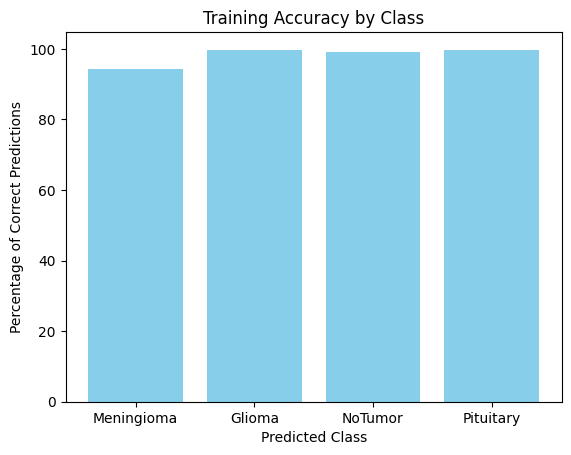

In [146]:
percentages = [np.mean(arr) * 100 for arr in dtr.values()]

plt.bar(dtr.keys(), percentages, color='skyblue')
plt.xlabel('Predicted Class')
plt.ylabel('Percentage of Correct Predictions')
plt.title('Training Accuracy by Class')
plt.show()

In [15]:
# Map string labels to integer labels
label_mapping = {'Glioma': 0, 'Meningioma': 1, 'Pituitary': 3, 'NoTumor': 2}

# Convert string labels to integer labels
train_y = [label_mapping[label] for label in train_y]
test_y = [label_mapping[label] for label in test_y]

# Convert labels to one-hot encoded format
train_y_one_hot = to_categorical(train_y, num_classes=4)  # Adjust num_classes based on your dataset
test_y_one_hot = to_categorical(test_y, num_classes=4)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  # Assuming 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y_one_hot, epochs=10, batch_size=32, validation_data=(test_x, test_y_one_hot))

Epoch 1/10
777/777 [==============================] - 26177s 34s/step - loss: 1.1338 - accuracy: 0.7548 - val_loss: 0.2803 - val_accuracy: 0.8987
Epoch 2/10
777/777 [==============================] - 4593s 6s/step - loss: 0.4227 - accuracy: 0.8285 - val_loss: 0.2085 - val_accuracy: 0.9307
Epoch 3/10
777/777 [==============================] - 4213s 5s/step - loss: 0.3577 - accuracy: 0.8601 - val_loss: 0.1706 - val_accuracy: 0.9413
Epoch 4/10
777/777 [==============================] - 5301s 7s/step - loss: 0.3168 - accuracy: 0.8772 - val_loss: 0.1220 - val_accuracy: 0.9573
Epoch 5/10
777/777 [==============================] - 3072s 4s/step - loss: 0.2884 - accuracy: 0.8941 - val_loss: 0.1081 - val_accuracy: 0.9657
Epoch 6/10
777/777 [==============================] - 3463s 4s/step - loss: 0.2604 - accuracy: 0.9076 - val_loss: 0.1219 - val_accuracy: 0.9627
Epoch 7/10
777/777 [==============================] - 4108s 5s/step - loss: 0.2481 - accuracy: 0.9151 - val_loss: 0.1690 - val_accurac

In [19]:
# Save the model if needed
model.save('brain_tumor_classification_resnet50.h5')

In [20]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_x,test_y_one_hot)
print(f'Test accuracy: {test_acc}')

332/332 [==============================] - 803s 2s/step - loss: 0.1110 - accuracy: 0.9677
Test accuracy: 0.9677327871322632


In [21]:
from keras.models import load_model

# Load the model
model = load_model('brain_tumor_classification_resnet50.h5')

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 256)               33554688  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 57143428 (217.98 MB)
Trainable params: 33555716 (128.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [38]:
import numpy as np

label_mapping = {0: 'Glioma', 1: 'Meningioma', 3:'Pituitary', 2:'NoTumor'}
image = np.expand_dims(train_x[9750], axis=0) 
class_name = np.argmax(model.predict(image))
label_mapping[class_name]

1/1 [==============================] - 0s 251ms/step


'Meningioma'

Text(0.5, 1.0, 'Meningioma')

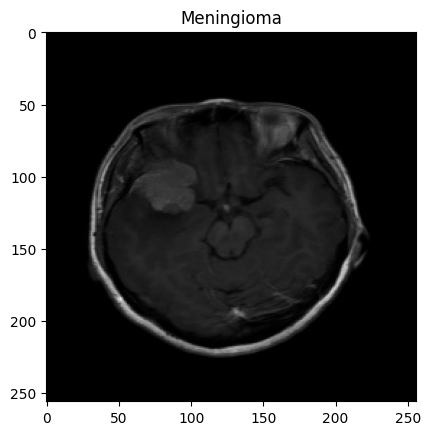

In [39]:
plt.imshow(train_x[9750])
plt.title(label_mapping[train_y[9750]])

In [40]:
image = np.expand_dims(train_x[1596], axis=0) 
class_name = np.argmax(model.predict(image))
label_mapping[class_name]

1/1 [==============================] - 0s 252ms/step


'Glioma'

Text(0.5, 1.0, 'Glioma')

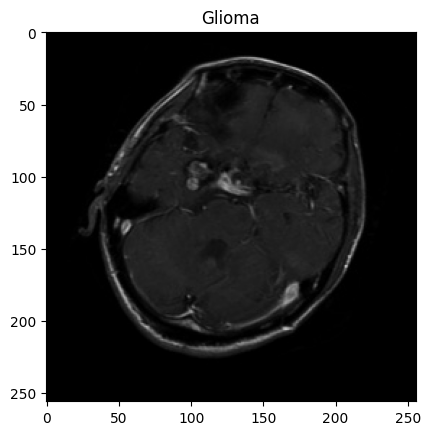

In [41]:
plt.imshow(train_x[1596])
plt.title(label_mapping[train_y[1586]])

In [42]:
image = np.expand_dims(test_x[10000], axis=0) 
class_name = np.argmax(model.predict(image))
label_mapping[class_name]

1/1 [==============================] - 0s 271ms/step


'Pituitary'

Text(0.5, 1.0, 'Pituitary')

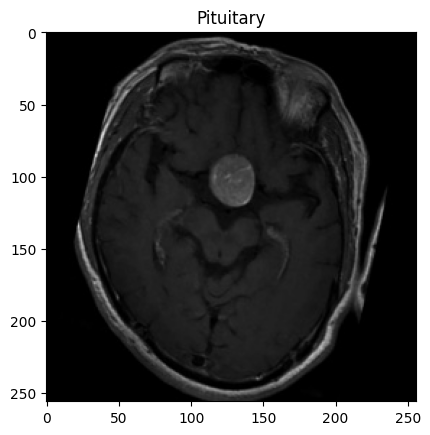

In [46]:
plt.imshow(test_x[10000])
plt.title(label_mapping[test_y[10000]])  

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Assuming you have the following variables defined: test_x, test_y_one_hot
# Map string labels to integer labels
label_mapping = {'Glioma': 0, 'Meningioma': 1, 'Pituitary': 3, 'NoTumor': 2}

# Make predictions on the test set
predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to integers
true_classes = np.argmax(test_y_one_hot, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

332/332 [==============================] - 808s 2s/step


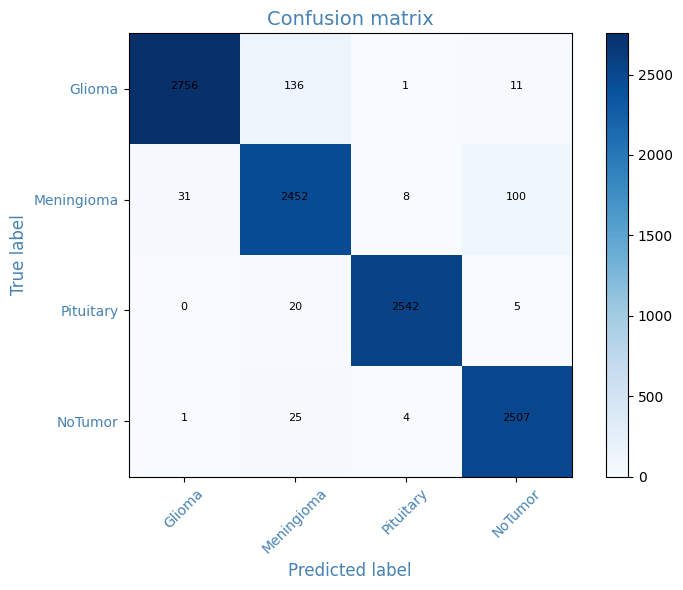

In [68]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):

    title = 'Confusion matrix'
    if normalize:
        y_true = y_true.astype('float') / y_true.sum(axis=0, keepdims=True)
        title = 'Normalized confusion matrix'
    
    # Define custom colors for the plot
    blue, green = "#4682B4", "#008000"
    
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.imshow(confusion_matrix(y_true, y_pred), interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14, color=blue)  # Adjust title fontsize and color
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=10, color=blue)  # Use blue for the ticks
    plt.yticks(tick_marks, classes, fontsize=10, color=blue)  # Use blue for the ticks

    fmt = '.2f' if normalize else 'd'
    thresh = y_true.max() / 2.
    for i, j in itertools.product(range(len(classes)), range(len(classes))):
        plt.text(j, i, format(y_true[i] if normalize else cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if y_true[i] > thresh else "black", fontsize=8)

    plt.ylabel('True label', fontsize=12, color=blue)  # Use blue for the labels
    plt.xlabel('Predicted label', fontsize=12, color=blue)  # Use blue for the labels
    plt.tight_layout()

# Plot non-normalized confusion matrix with a blue and green theme (Blues)
plot_confusion_matrix(true_classes, predicted_classes, classes=label_mapping.keys(), normalize=False, cmap=plt.cm.Blues)

plt.show()